In [41]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import scipy.io as sio 
import matplotlib.cm as cm
import PyNAFF as pnf

In [42]:
plt.rcParams['figure.figsize'] = [8.0, 4.0]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['lines.linewidth'] = 1

In [43]:
def add_input_file(dd, filename, label):
	f = filename
	p = dict()
	sio.loadmat(f, mdict=p)
	dd[label] = p	
	print '\tAdded output data from ', filename, '\t dictionary key: ', label
	return dd

In [44]:
dd1 = dict()

#dd1 = add_input_file(dd1, '01_SbS_Tomo_V10_dBeta_00/output/output.mat', '00')
#dd1 = add_input_file(dd1, '02_NoSC_Tomo_V10_betatron_01/output/output.mat', '01')
dd1 = add_input_file(dd1, '02_NoSC_Tomo_V10_betatron_02/output/output.mat', '02')
dd1 = add_input_file(dd1, '02_NoSC_Tomo_V10_betatron_03/output/output.mat', '03')
dd1 = add_input_file(dd1, '02_NoSC_Tomo_V10_betatron_04/output/output.mat', '04')
dd1 = add_input_file(dd1, '02_NoSC_Tomo_V10_betatron_05/output/output.mat', '05')
dd1 = add_input_file(dd1, '02_NoSC_Tomo_V10_betatron_10/output/output.mat', '10')
dd1 = add_input_file(dd1, '02_NoSC_Tomo_V10_betatron_15/output/output.mat', '15')
dd1 = add_input_file(dd1, '02_NoSC_Tomo_V10_betatron_20/output/output.mat', '20')
dd1 = add_input_file(dd1, '02_NoSC_Tomo_V10_betatron_25/output/output.mat', '25')
sc = 'NoSC'
legend_label = r'$\frac{\delta \beta}{\beta} [\%]$'

Plot_Folder = 'Plots_02'    
main_label = 'Betatron Mismatch Vertical'
main_label2 = main_label + '_zoom'
scaled_label = main_label + '_scaled'
turn_tot = 2200
zoom_turns = 15
turns = [0, 1, 10, 50, 100, 874, 2185, 2199]
betagamma = 2.492104532 * 0.9159915293879255

	Added output data from  02_NoSC_Tomo_V10_betatron_02/output/output.mat 	 dictionary key:  02
	Added output data from  02_NoSC_Tomo_V10_betatron_03/output/output.mat 	 dictionary key:  03
	Added output data from  02_NoSC_Tomo_V10_betatron_04/output/output.mat 	 dictionary key:  04
	Added output data from  02_NoSC_Tomo_V10_betatron_05/output/output.mat 	 dictionary key:  05
	Added output data from  02_NoSC_Tomo_V10_betatron_10/output/output.mat 	 dictionary key:  10
	Added output data from  02_NoSC_Tomo_V10_betatron_15/output/output.mat 	 dictionary key:  15
	Added output data from  02_NoSC_Tomo_V10_betatron_20/output/output.mat 	 dictionary key:  20
	Added output data from  02_NoSC_Tomo_V10_betatron_25/output/output.mat 	 dictionary key:  25


In [45]:
dd1['02'].keys()

['eps_z',
 'D_x',
 'D_y',
 'kurtosis_yp_6sig',
 'kurtosis_yp',
 'mu_yp',
 'kurtosis_z_6sig',
 'eff_beta_y',
 'eff_beta_x',
 'eff_alpha_y',
 'kurtosis_y_6sig',
 'epsn_y',
 'epsn_x',
 'beta_y',
 'beta_x',
 'dpp_rms',
 'sig_yp',
 'min_dE',
 'turn_time',
 'n_mp',
 'min_xp',
 'kurtosis_y',
 'kurtosis_xp_6sig',
 'alpha_x',
 'alpha_y',
 'bunchlength',
 '__header__',
 'sig_xp',
 'kurtosis_dE_6sig',
 'max_xp',
 'intensity',
 'min_yp',
 'sig_dE',
 'min_x',
 'min_y',
 'mu_y',
 'mu_x',
 'cumulative_time',
 'mean_yp',
 'kurtosis_xp',
 'eff_epsn_y',
 'eff_epsn_x',
 'mean_x',
 'mean_y',
 'mean_z',
 'kurtosis_x_6sig',
 '__version__',
 'max_z',
 'mu_dE',
 'max_x',
 'max_y',
 'mean_dE',
 'sig_z',
 'sig_y',
 'sig_x',
 'max_yp',
 'kurtosis_z',
 'eff_alpha_x',
 'kurtosis_x',
 'mu_xp',
 'turn_duration',
 'mu_z',
 'mean_xp',
 'min_z',
 'kurtosis_dE',
 '__globals__',
 'turn',
 'max_dE',
 'gamma']

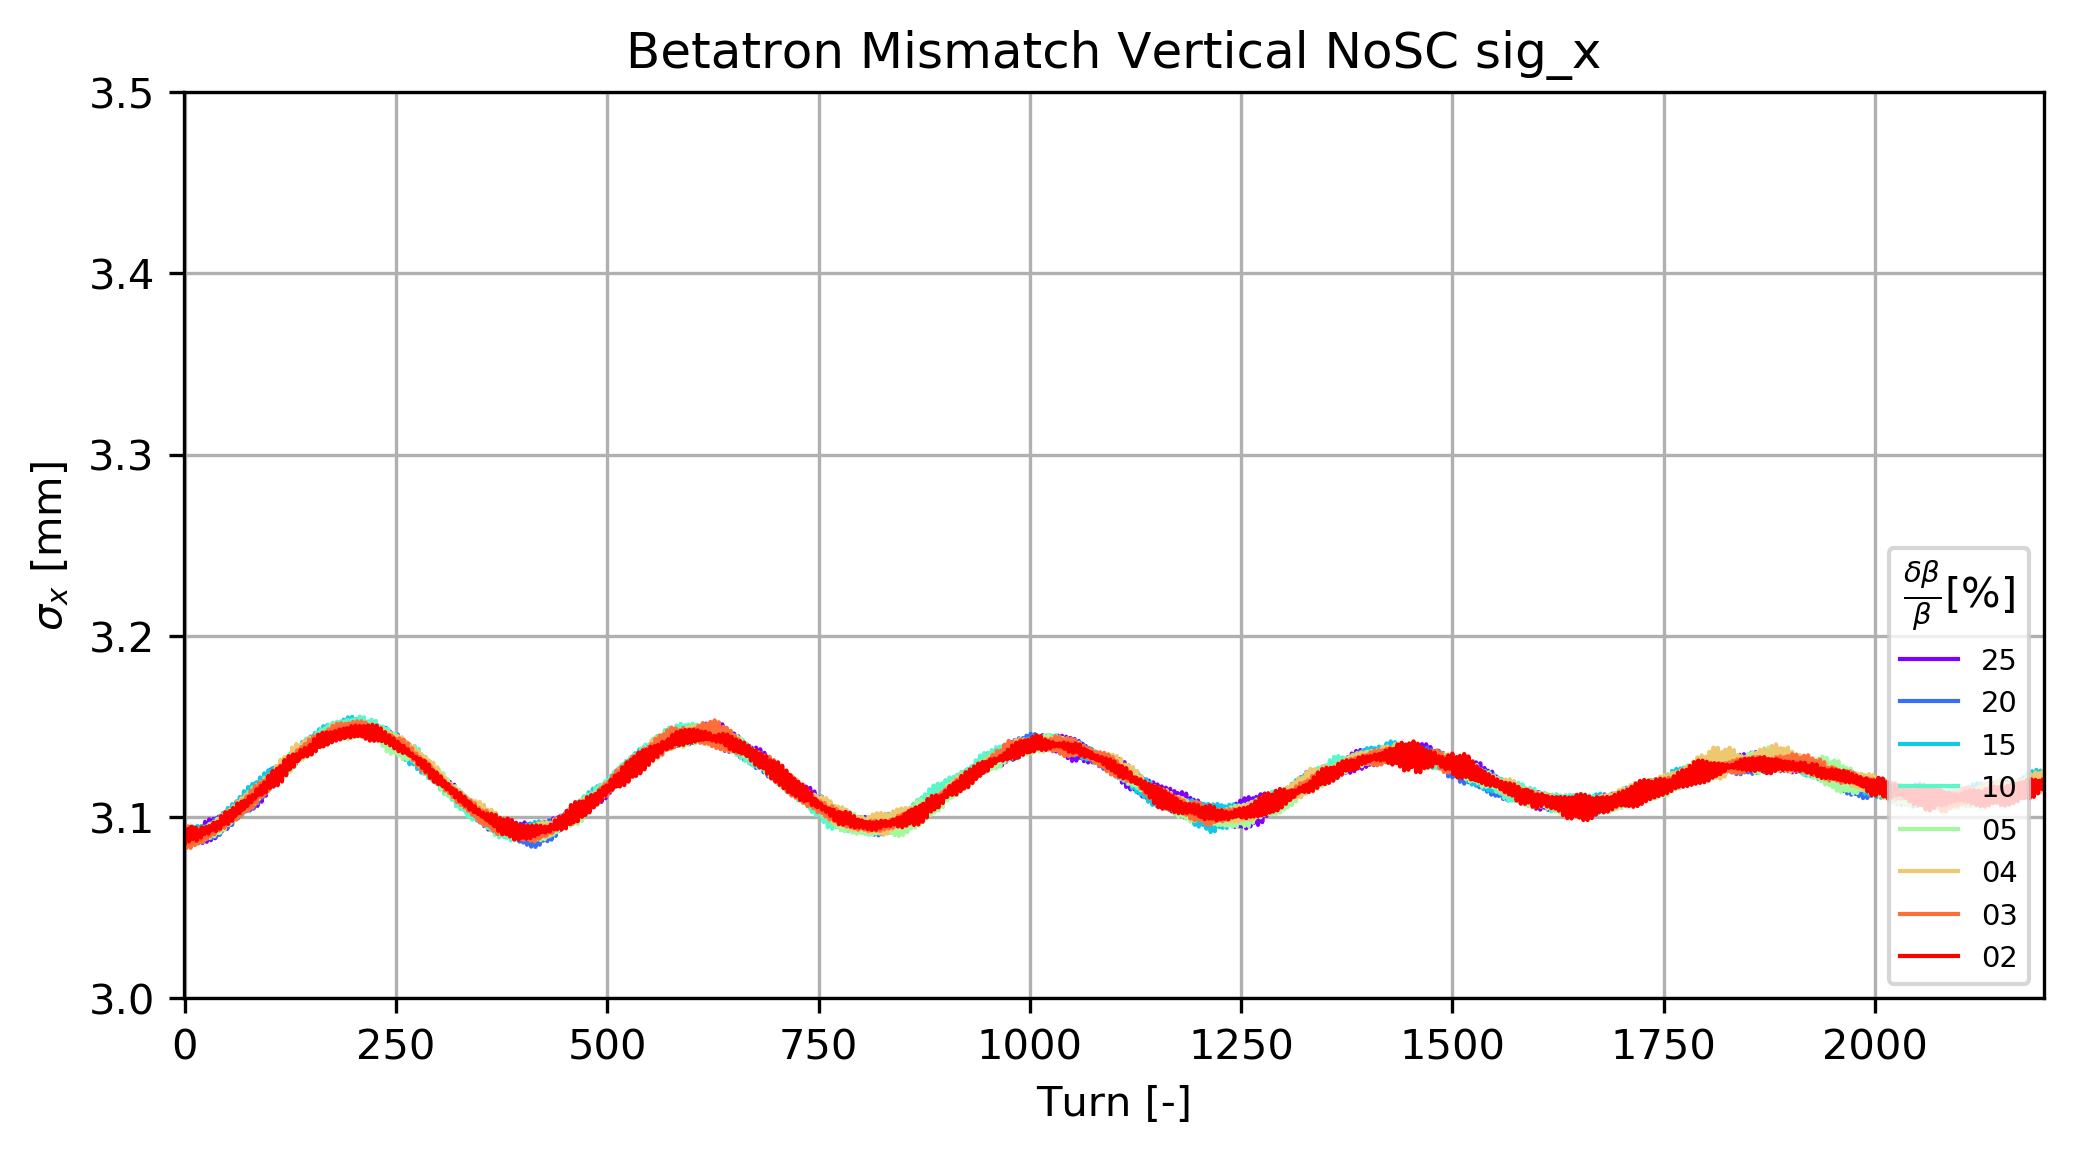

In [54]:
parameter = 'sig_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_x$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1000, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
ax1.set_ylim(3,3.5)

savename = Plot_Folder +'/Betatron_' + parameter + '_V.png'
plt.savefig(savename, dpi = 800);

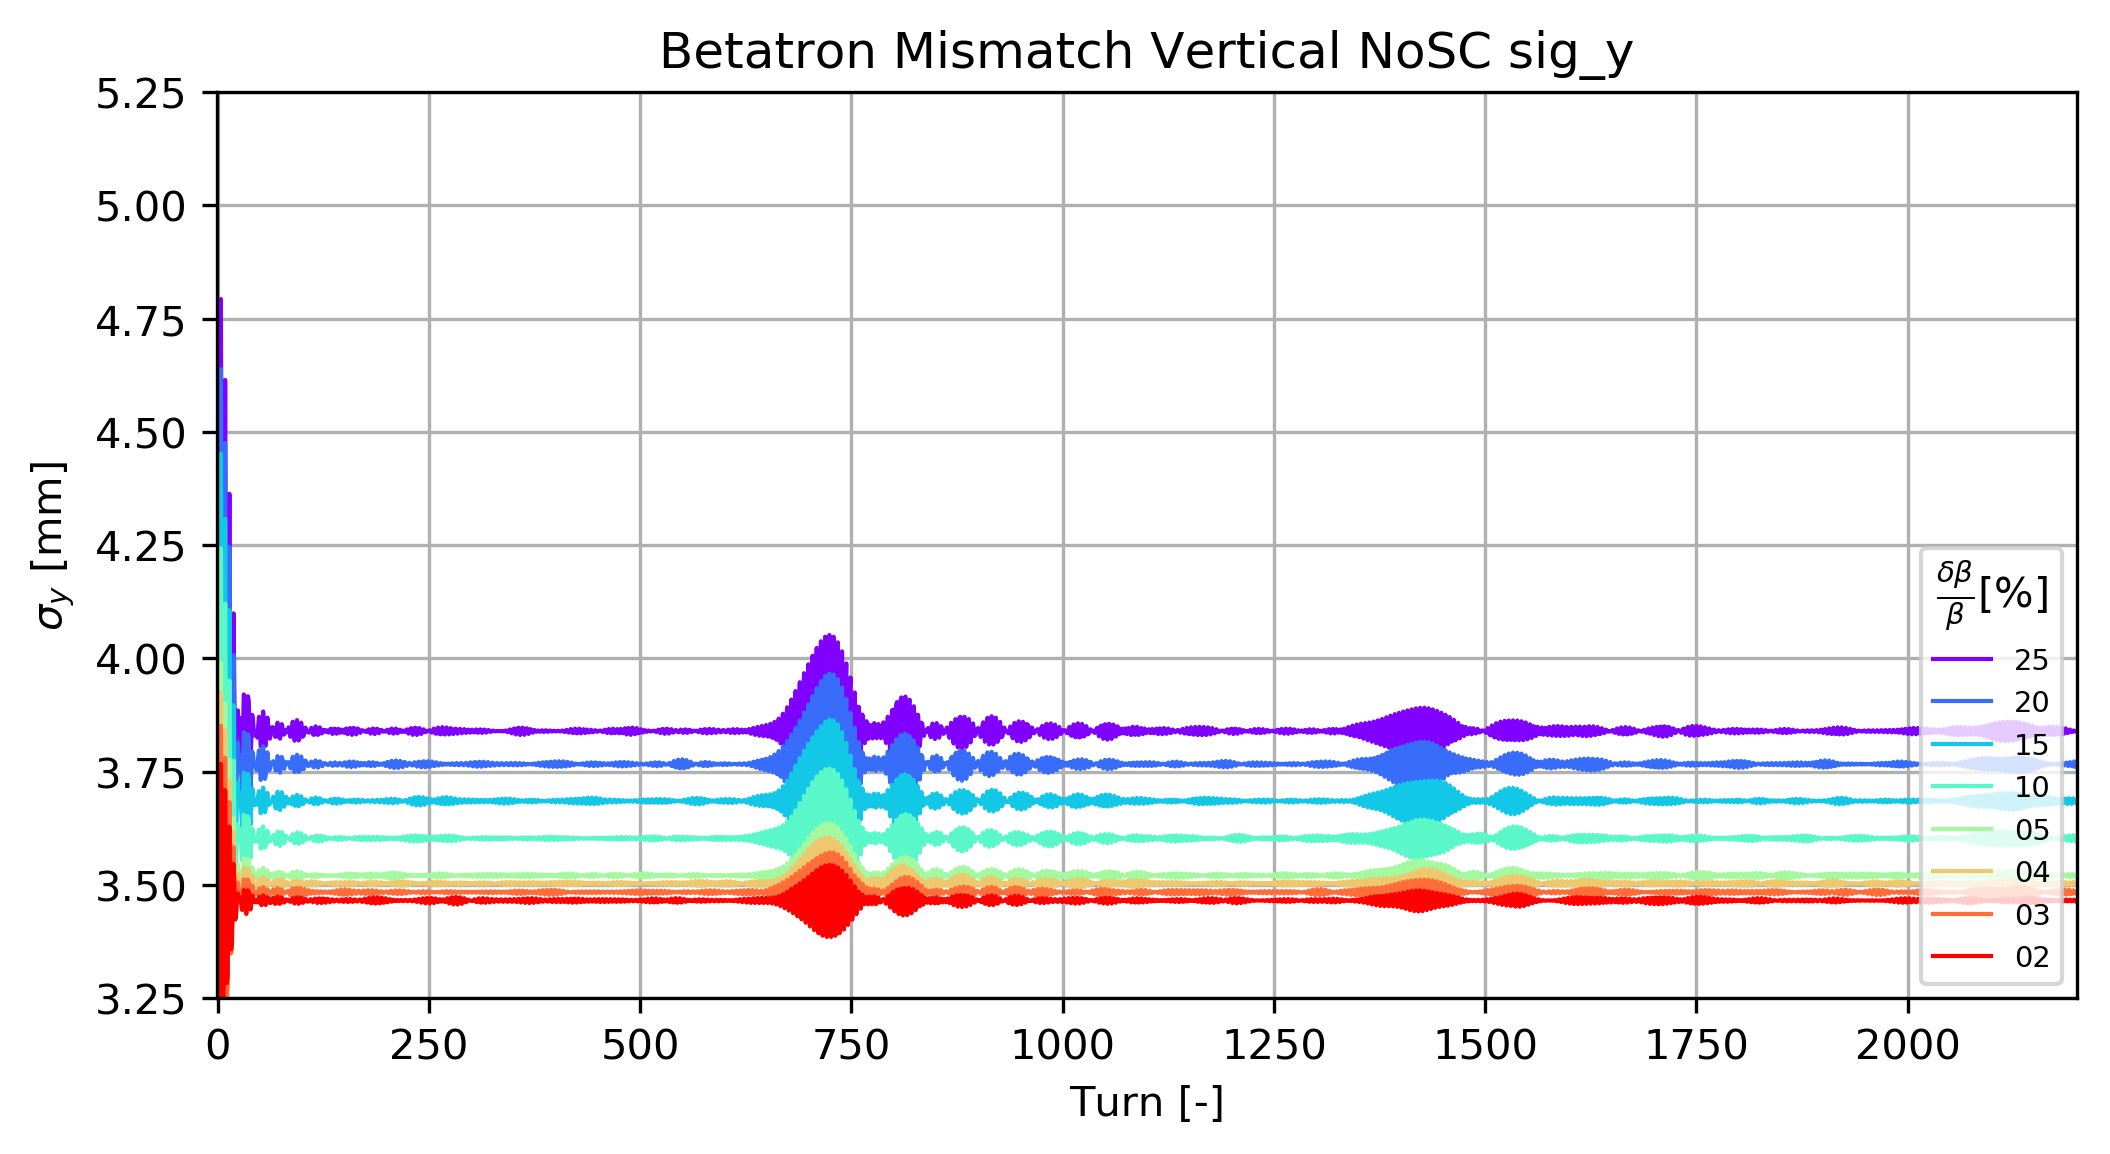

In [55]:
parameter = 'sig_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_y$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1000, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label);
ax1.grid();
ax1.set_xlim(-1,2200);
ax1.set_ylim(3.25, 5.25)

savename = Plot_Folder +'/Betatron_' + parameter + '_V.png'
plt.savefig(savename, dpi = 800);

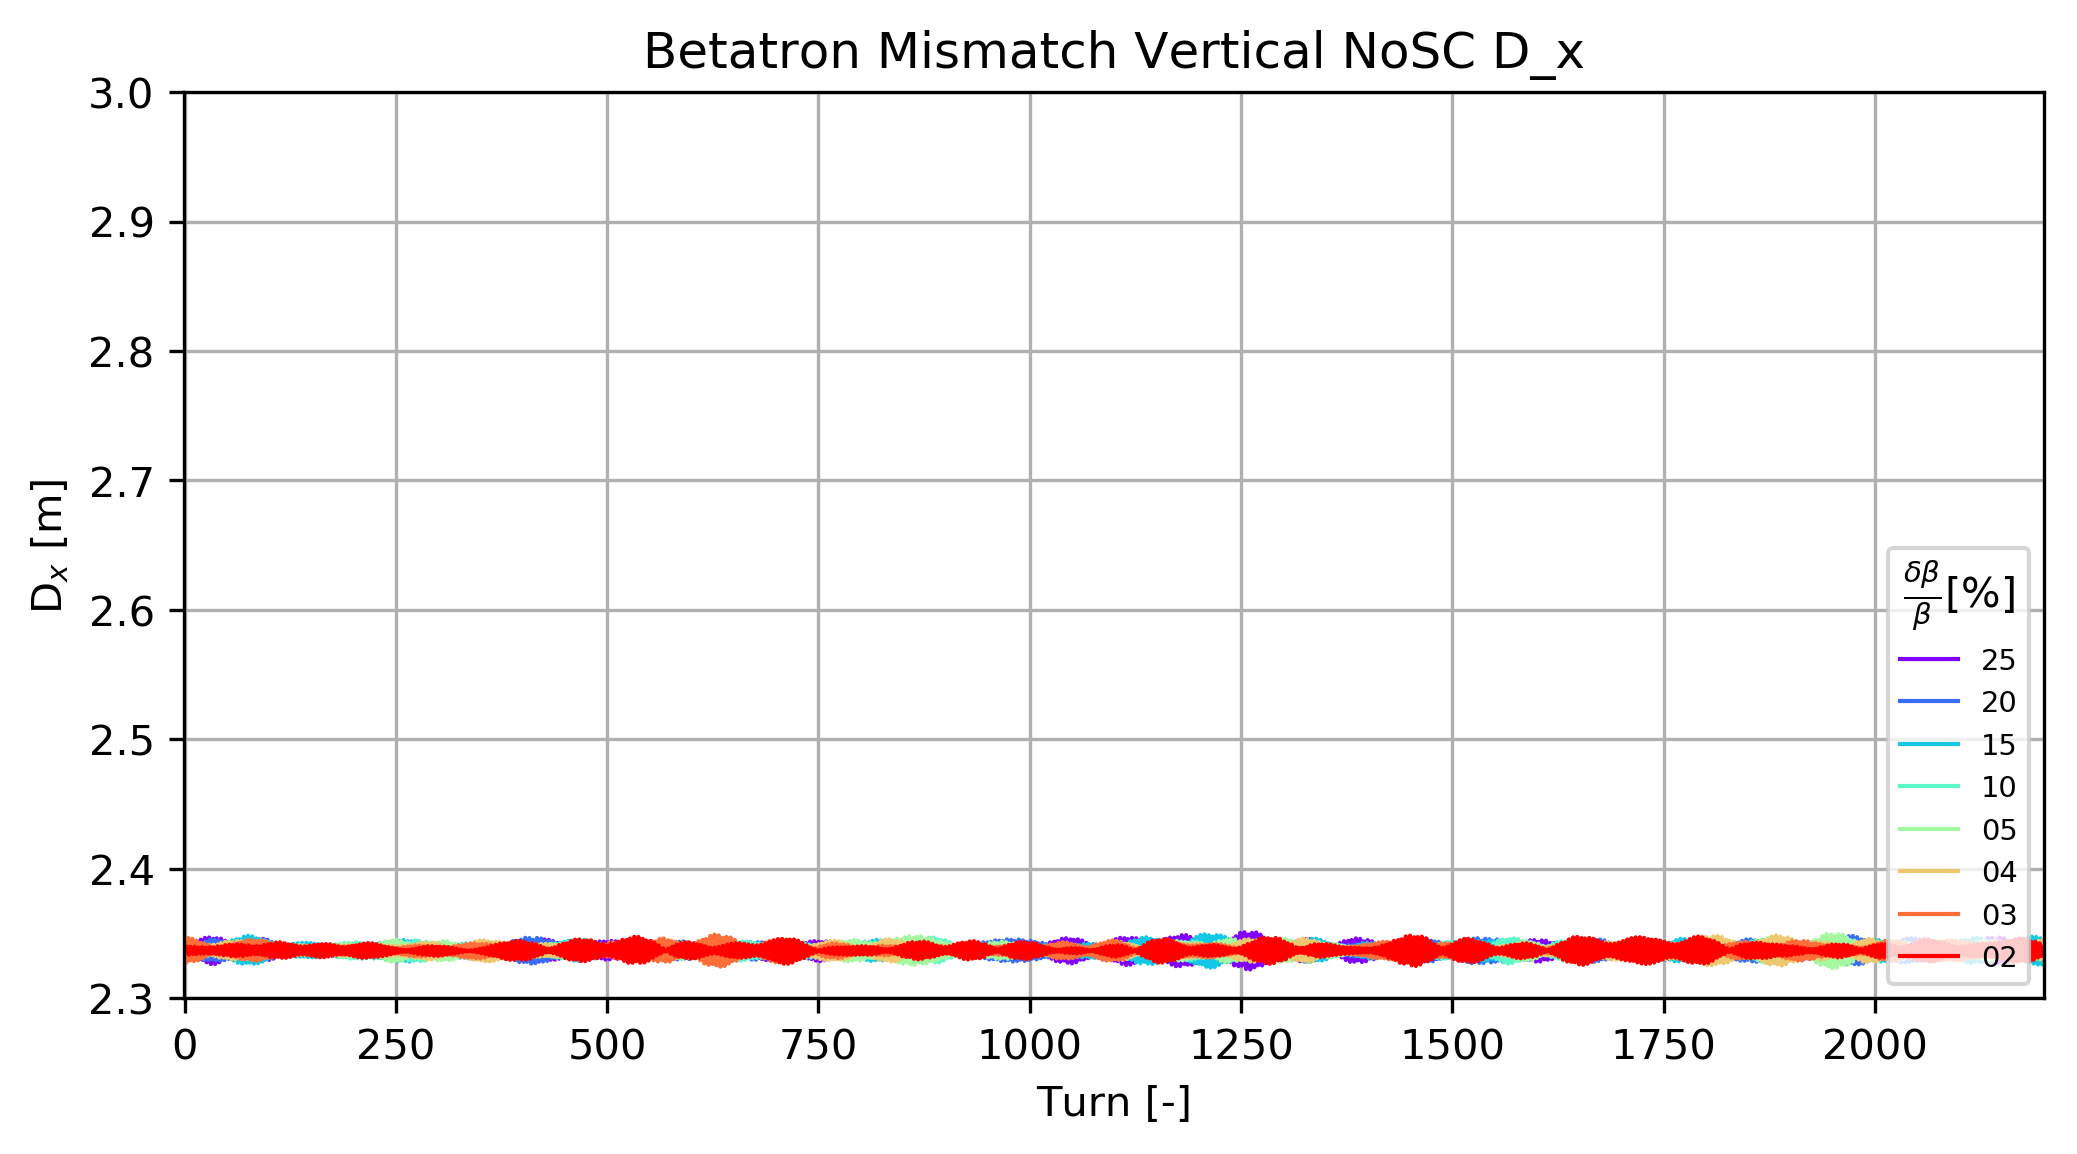

In [56]:
parameter = 'D_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'D$_x$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label);
ax1.grid();
ax1.set_xlim(-1,2200);
ax1.set_ylim(2.3, 3)

savename = Plot_Folder +'/Betatron_' + parameter + '_V.png'
plt.savefig(savename, dpi = 800);

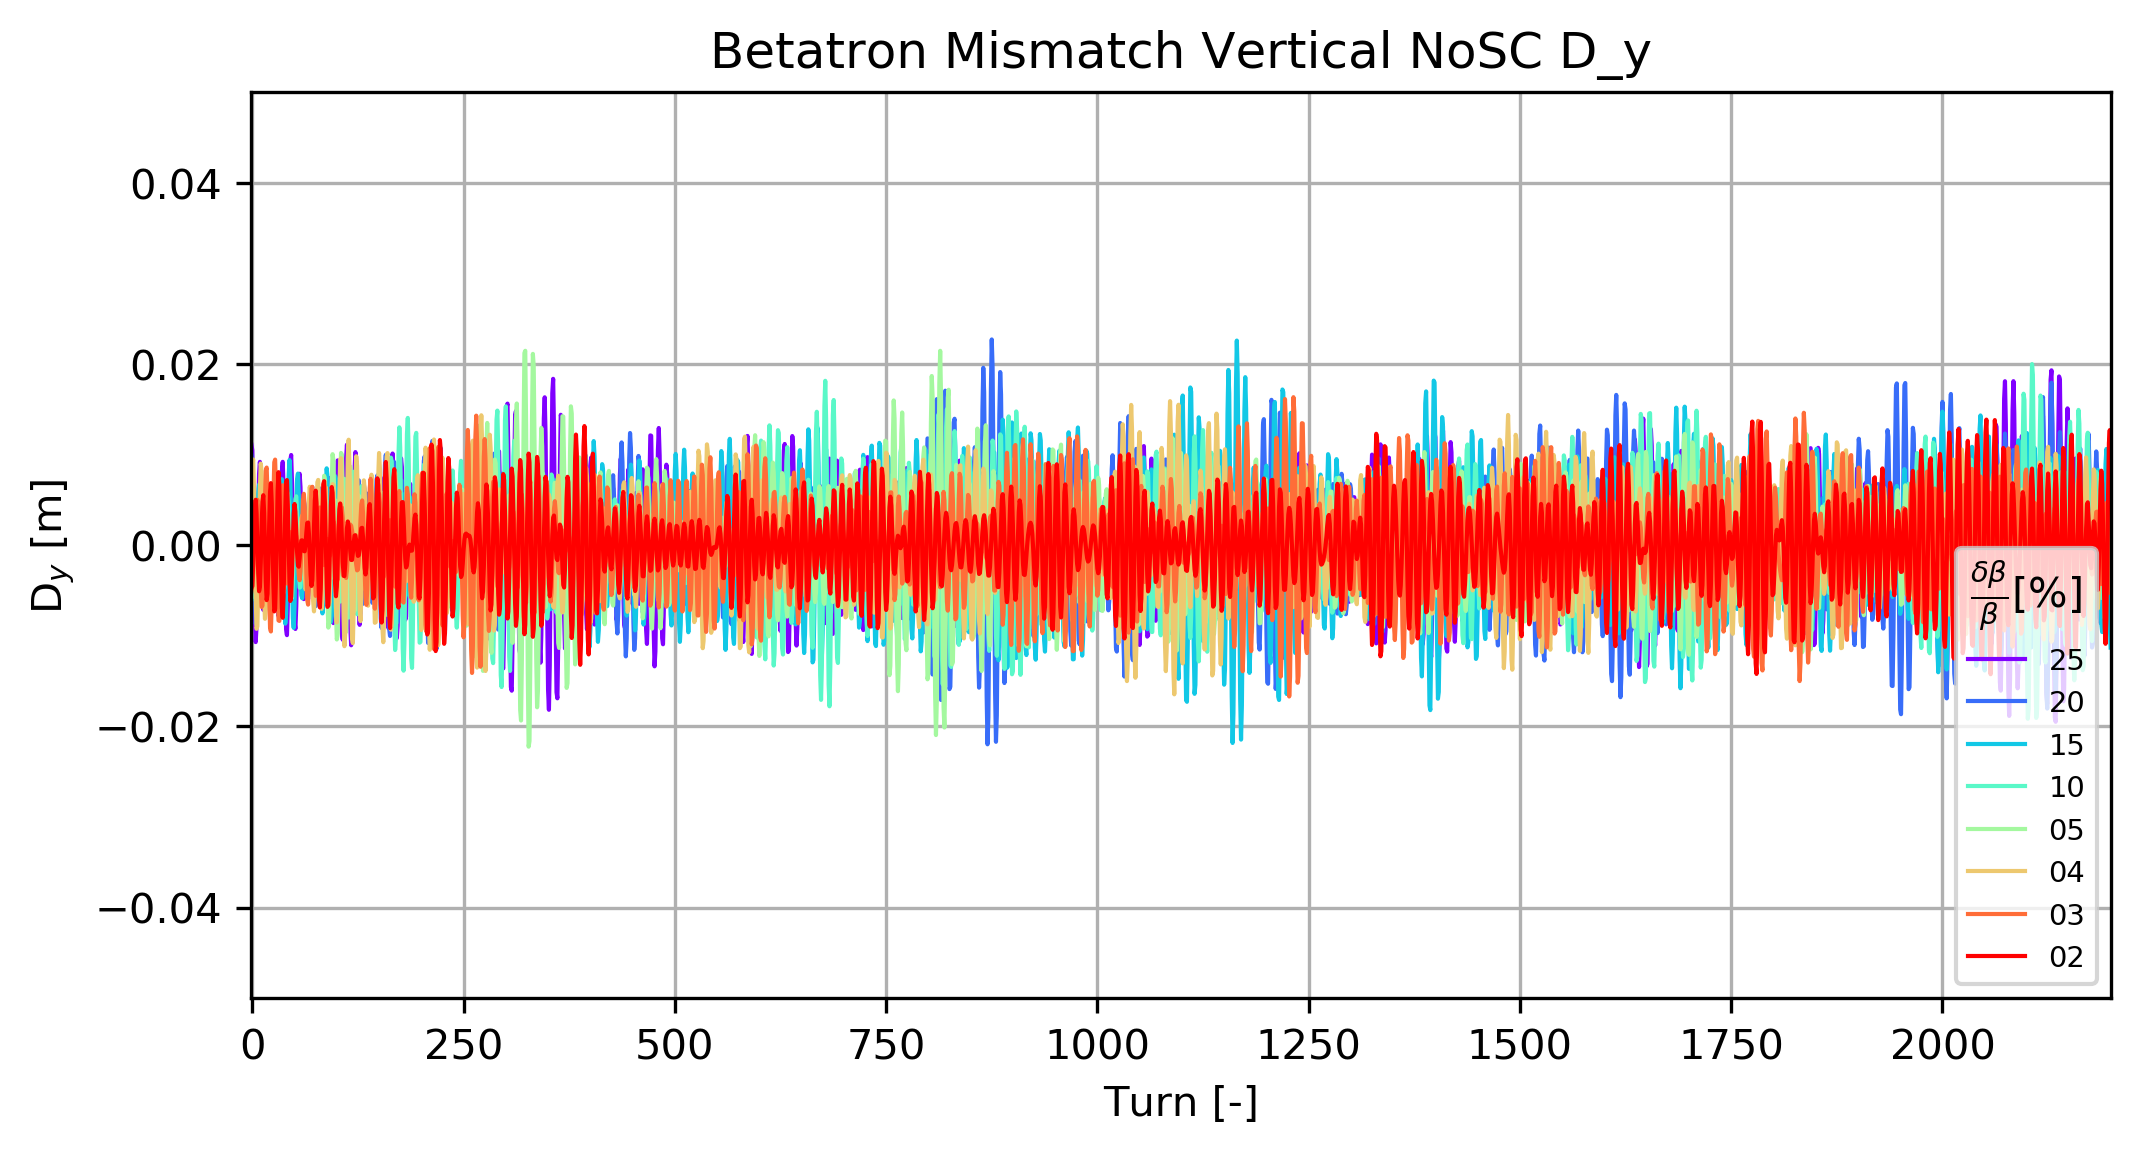

In [57]:
parameter = 'D_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'D$_y$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label);
ax1.grid();
ax1.set_xlim(-1,2200);
ax1.set_ylim(-0.05, 0.05)

savename = Plot_Folder +'/Betatron_' + parameter + '_V.png'
plt.savefig(savename, dpi = 800);

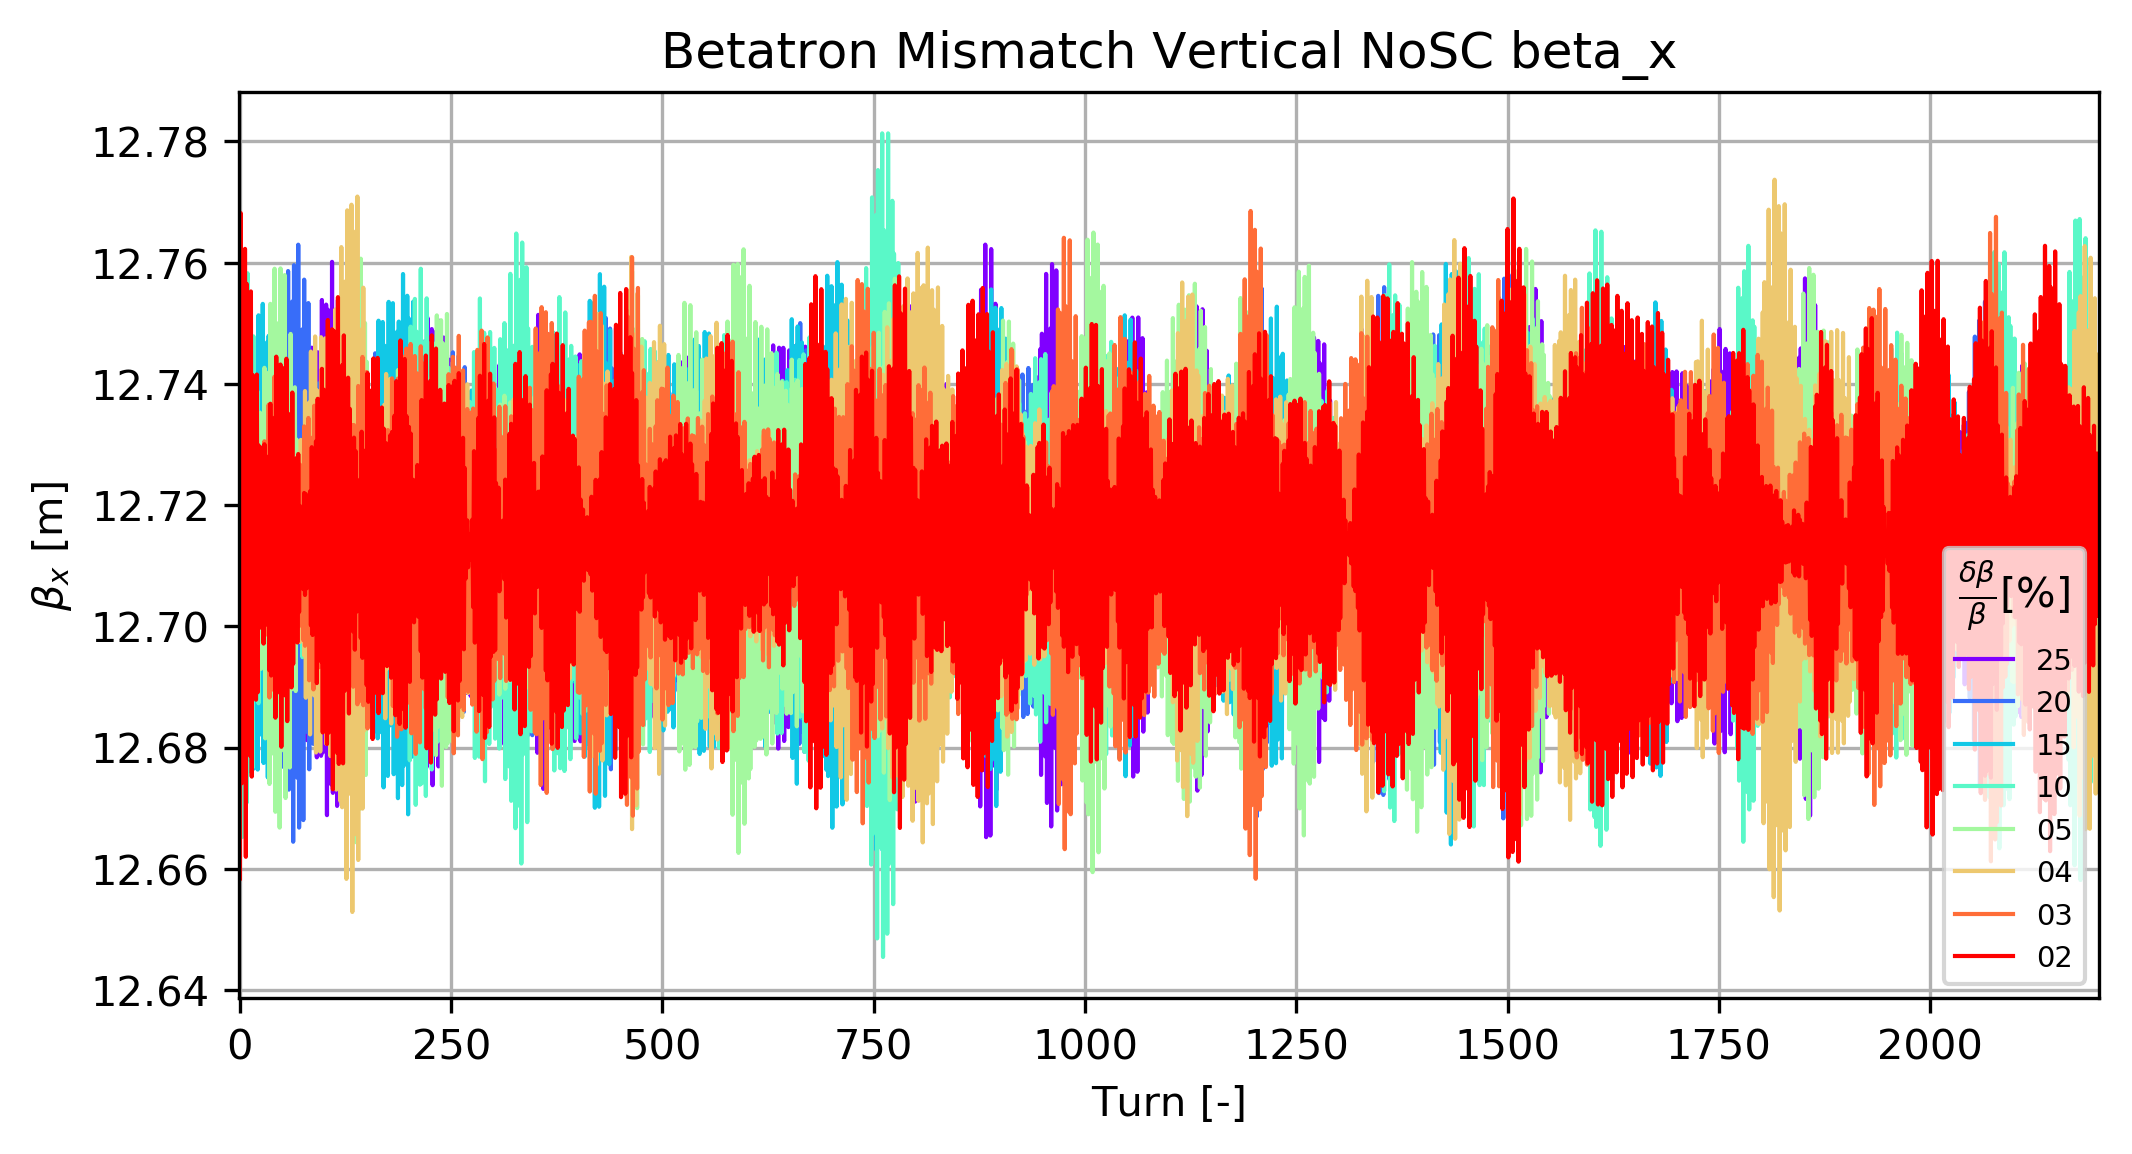

In [58]:
parameter = 'beta_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\beta_x$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label);
ax1.grid();
ax1.set_xlim(-1,2200);

savename = Plot_Folder +'/Betatron_' + parameter + '_V.png'
plt.savefig(savename, dpi = 800);

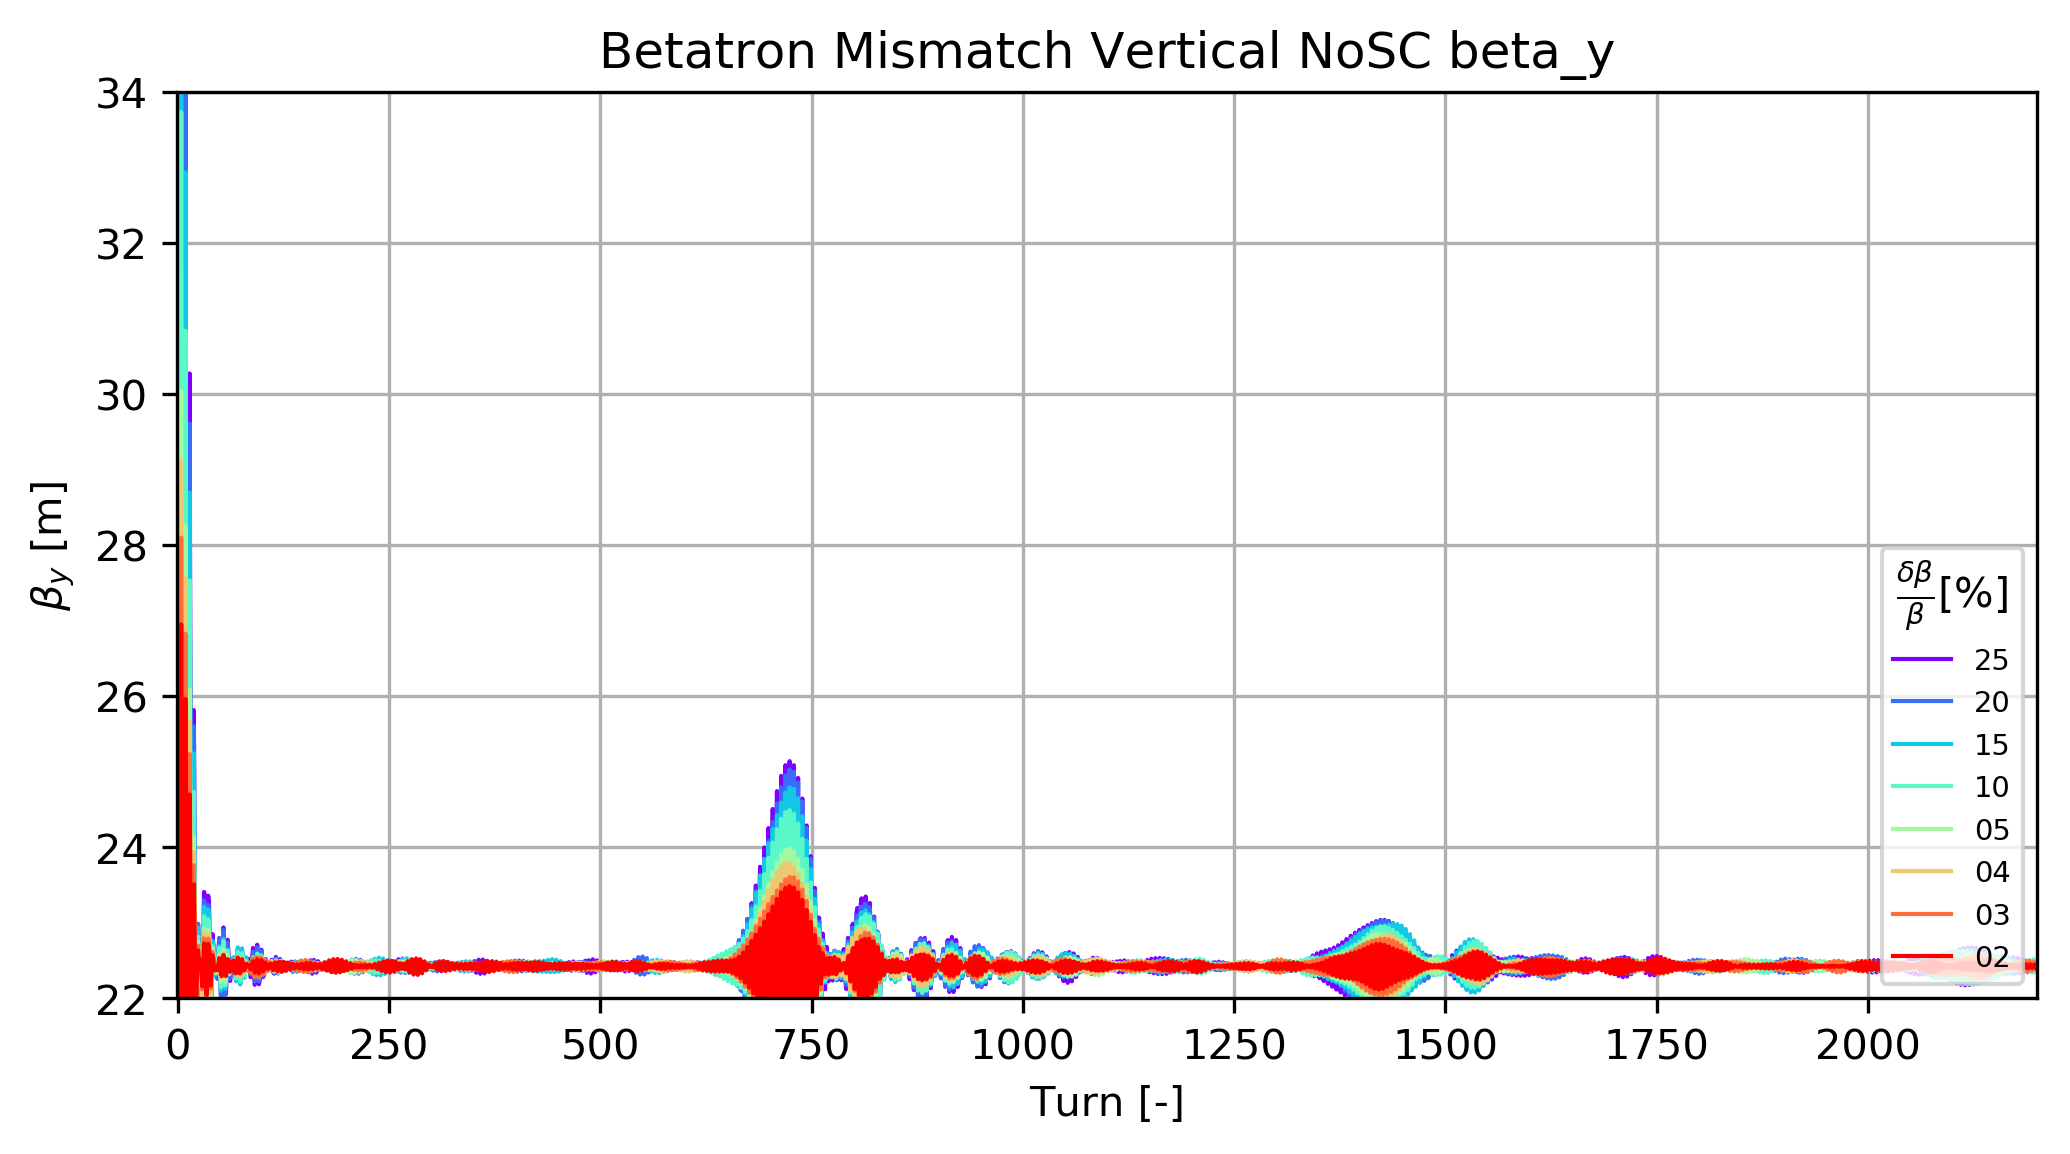

In [59]:
parameter = 'beta_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\beta_y$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label);
ax1.grid();
ax1.set_xlim(-1,2200);
ax1.set_ylim(22, 34)

savename = Plot_Folder +'/Betatron_' + parameter + '_V.png'
plt.savefig(savename, dpi = 800);

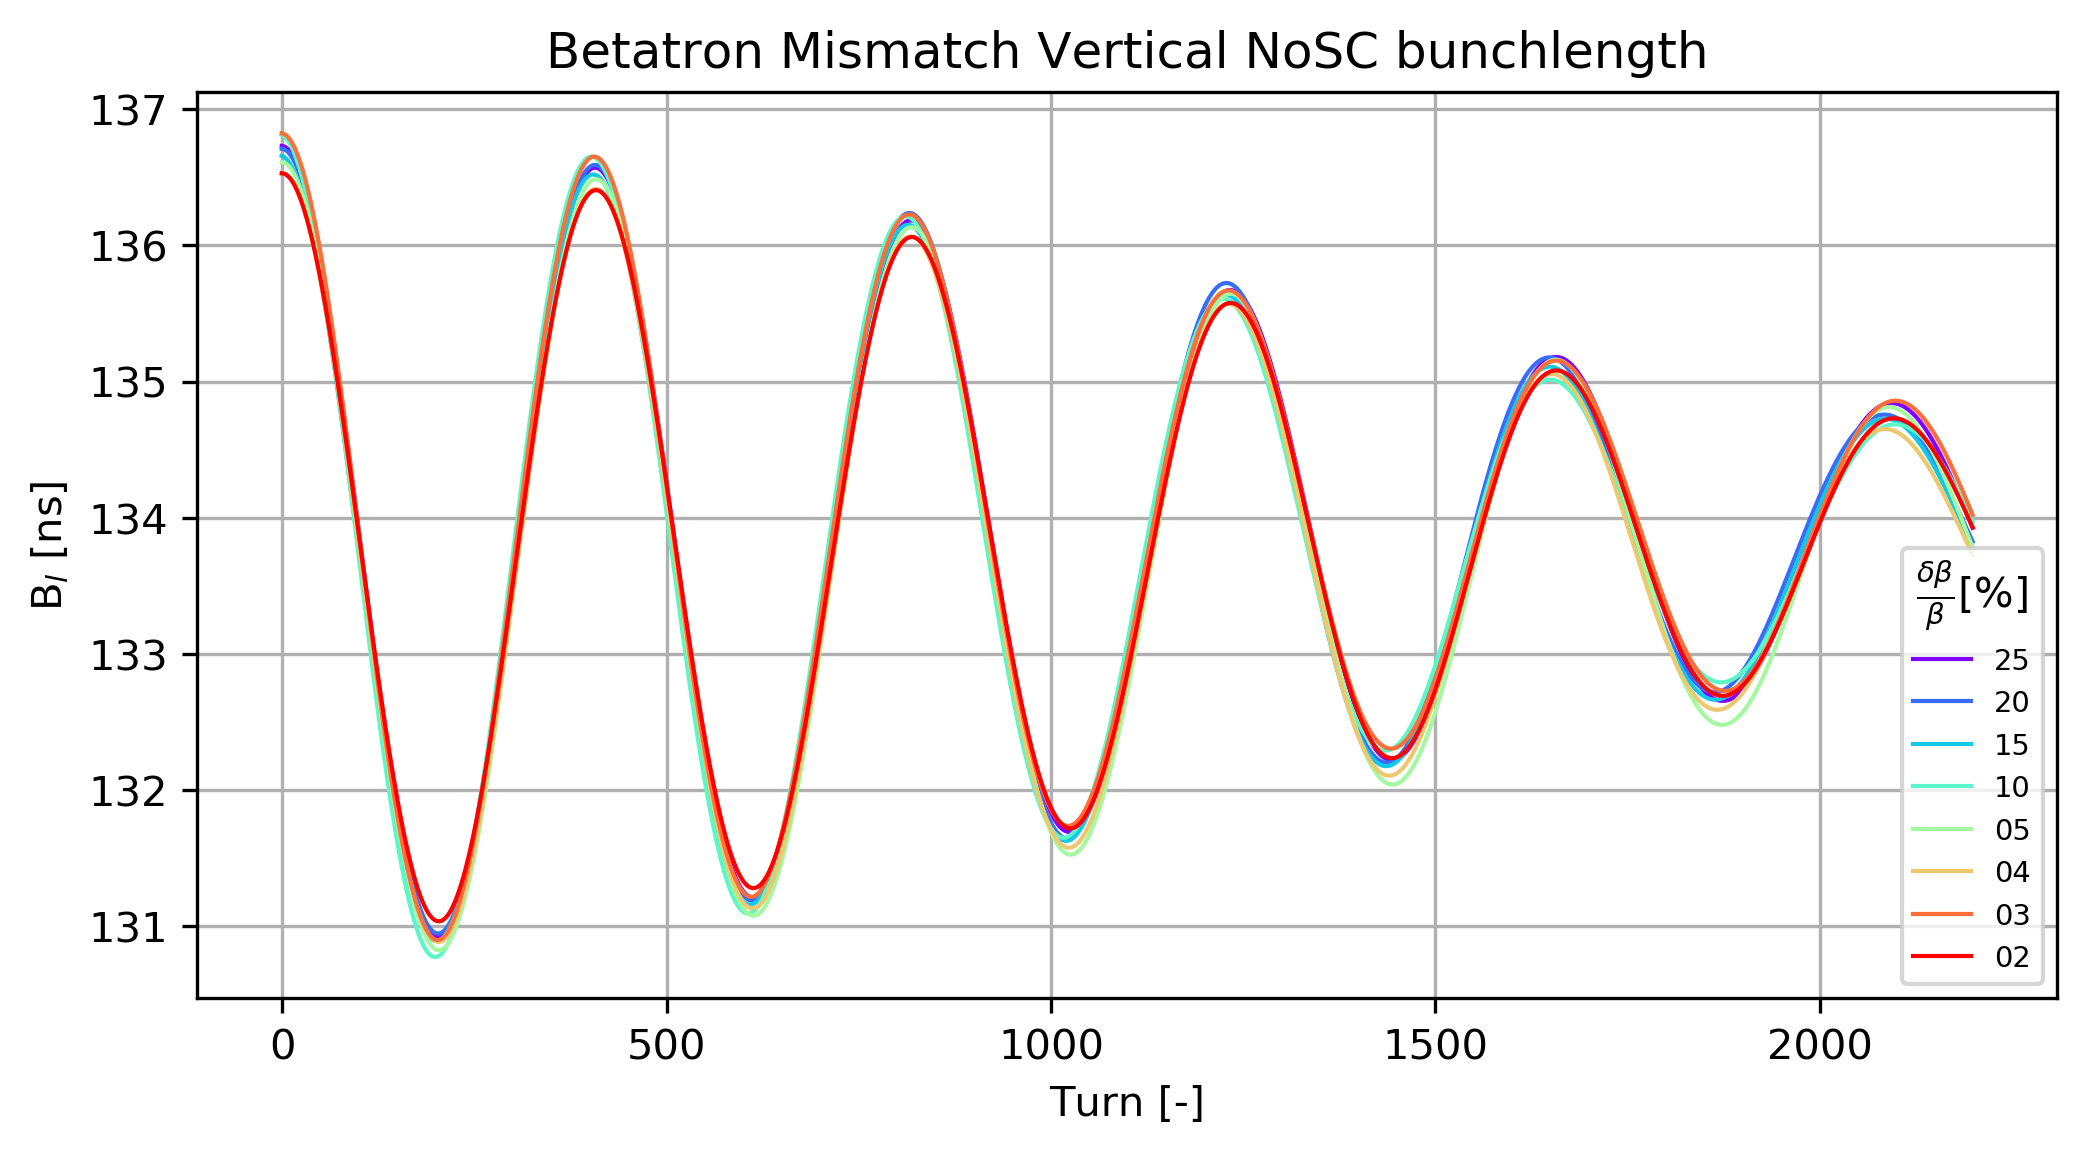

In [62]:
parameter = 'bunchlength'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'B$_l$ [ns]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1E9, label=key, color=colors[c_it]);
        c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label);
ax1.grid();
#ax1.set_xlim(-1,10);
#ax1.set_ylim(125,150)
#ax1.set_ylim(134,144)

savename = Plot_Folder +'/Betatron_' + parameter + '_V.png'
plt.savefig(savename, dpi = 800);

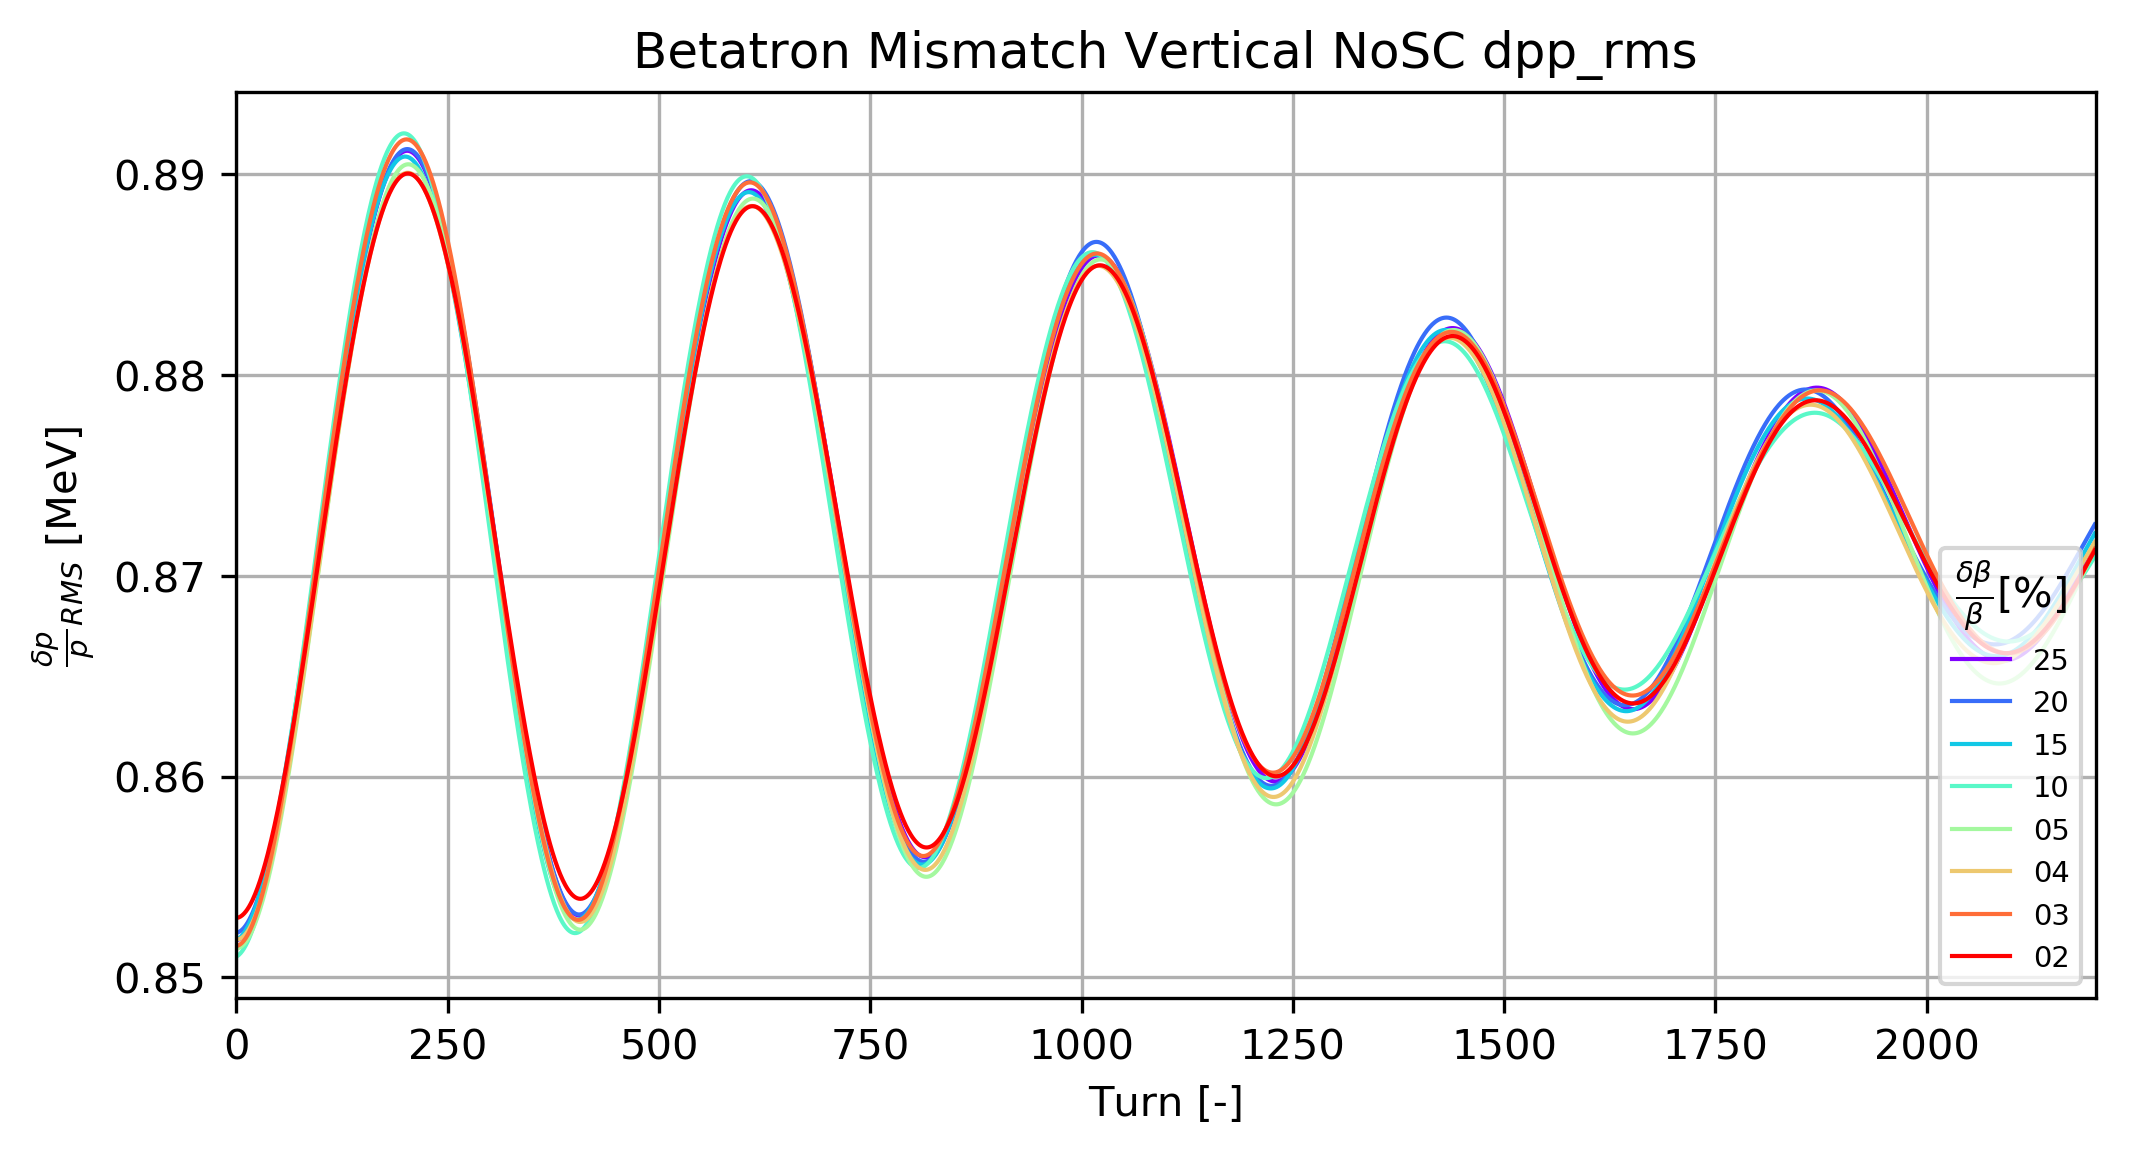

In [65]:
parameter = 'dpp_rms'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\frac{\delta p}{p}_{RMS}$ [MeV]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1000, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label);
ax1.grid();
ax1.set_xlim(-1,2200);

savename = Plot_Folder +'/Betatron_' + parameter + '_V.png'
plt.savefig(savename, dpi = 800);

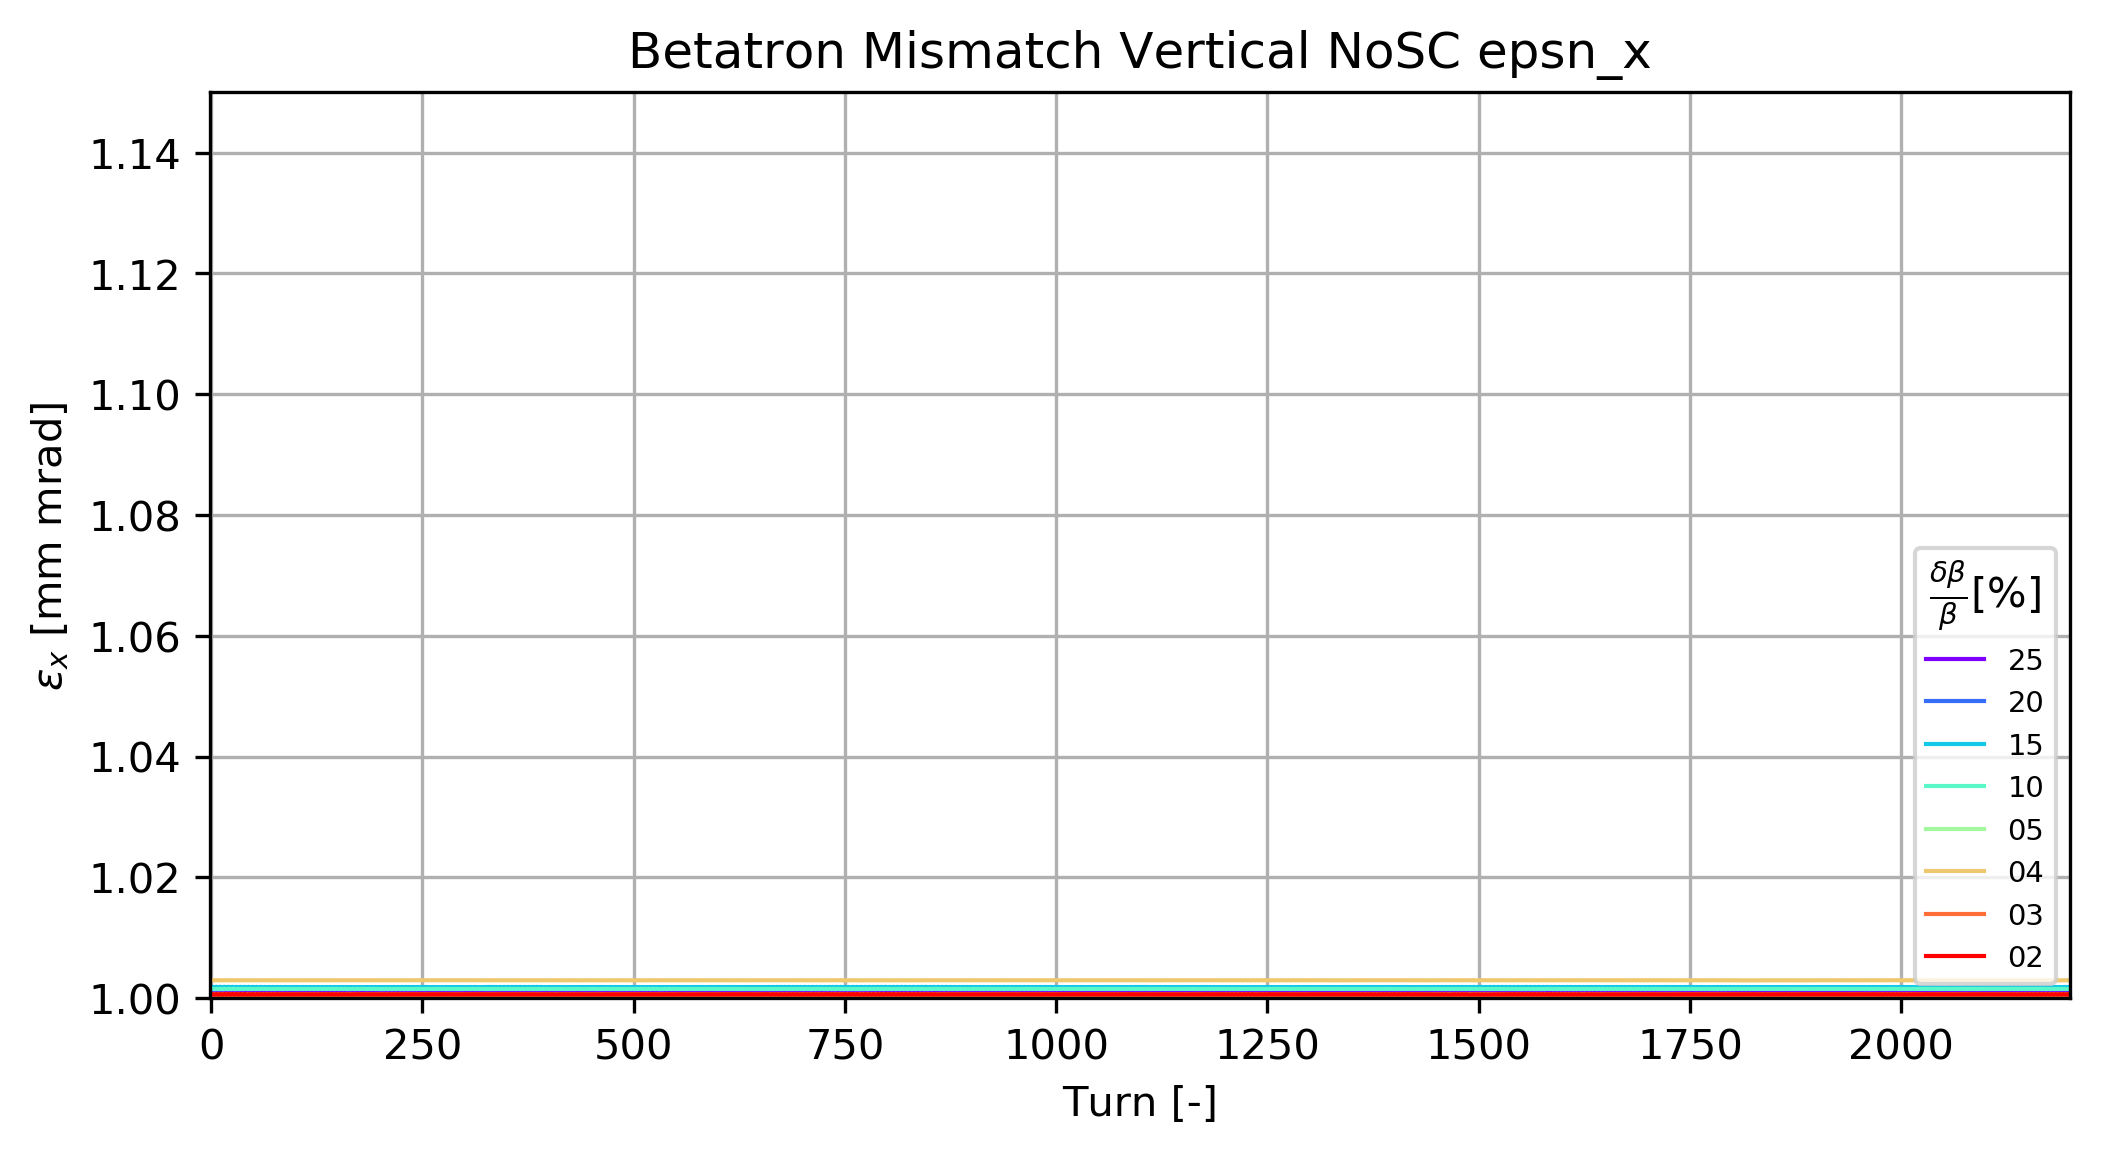

In [66]:
parameter = 'epsn_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_x$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1E6, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label);
ax1.grid();
ax1.set_xlim(-1,2200);
ax1.set_ylim(1., 1.15)

savename = Plot_Folder +'/Betatron_' + parameter + '_V.png'
plt.savefig(savename, dpi = 800);

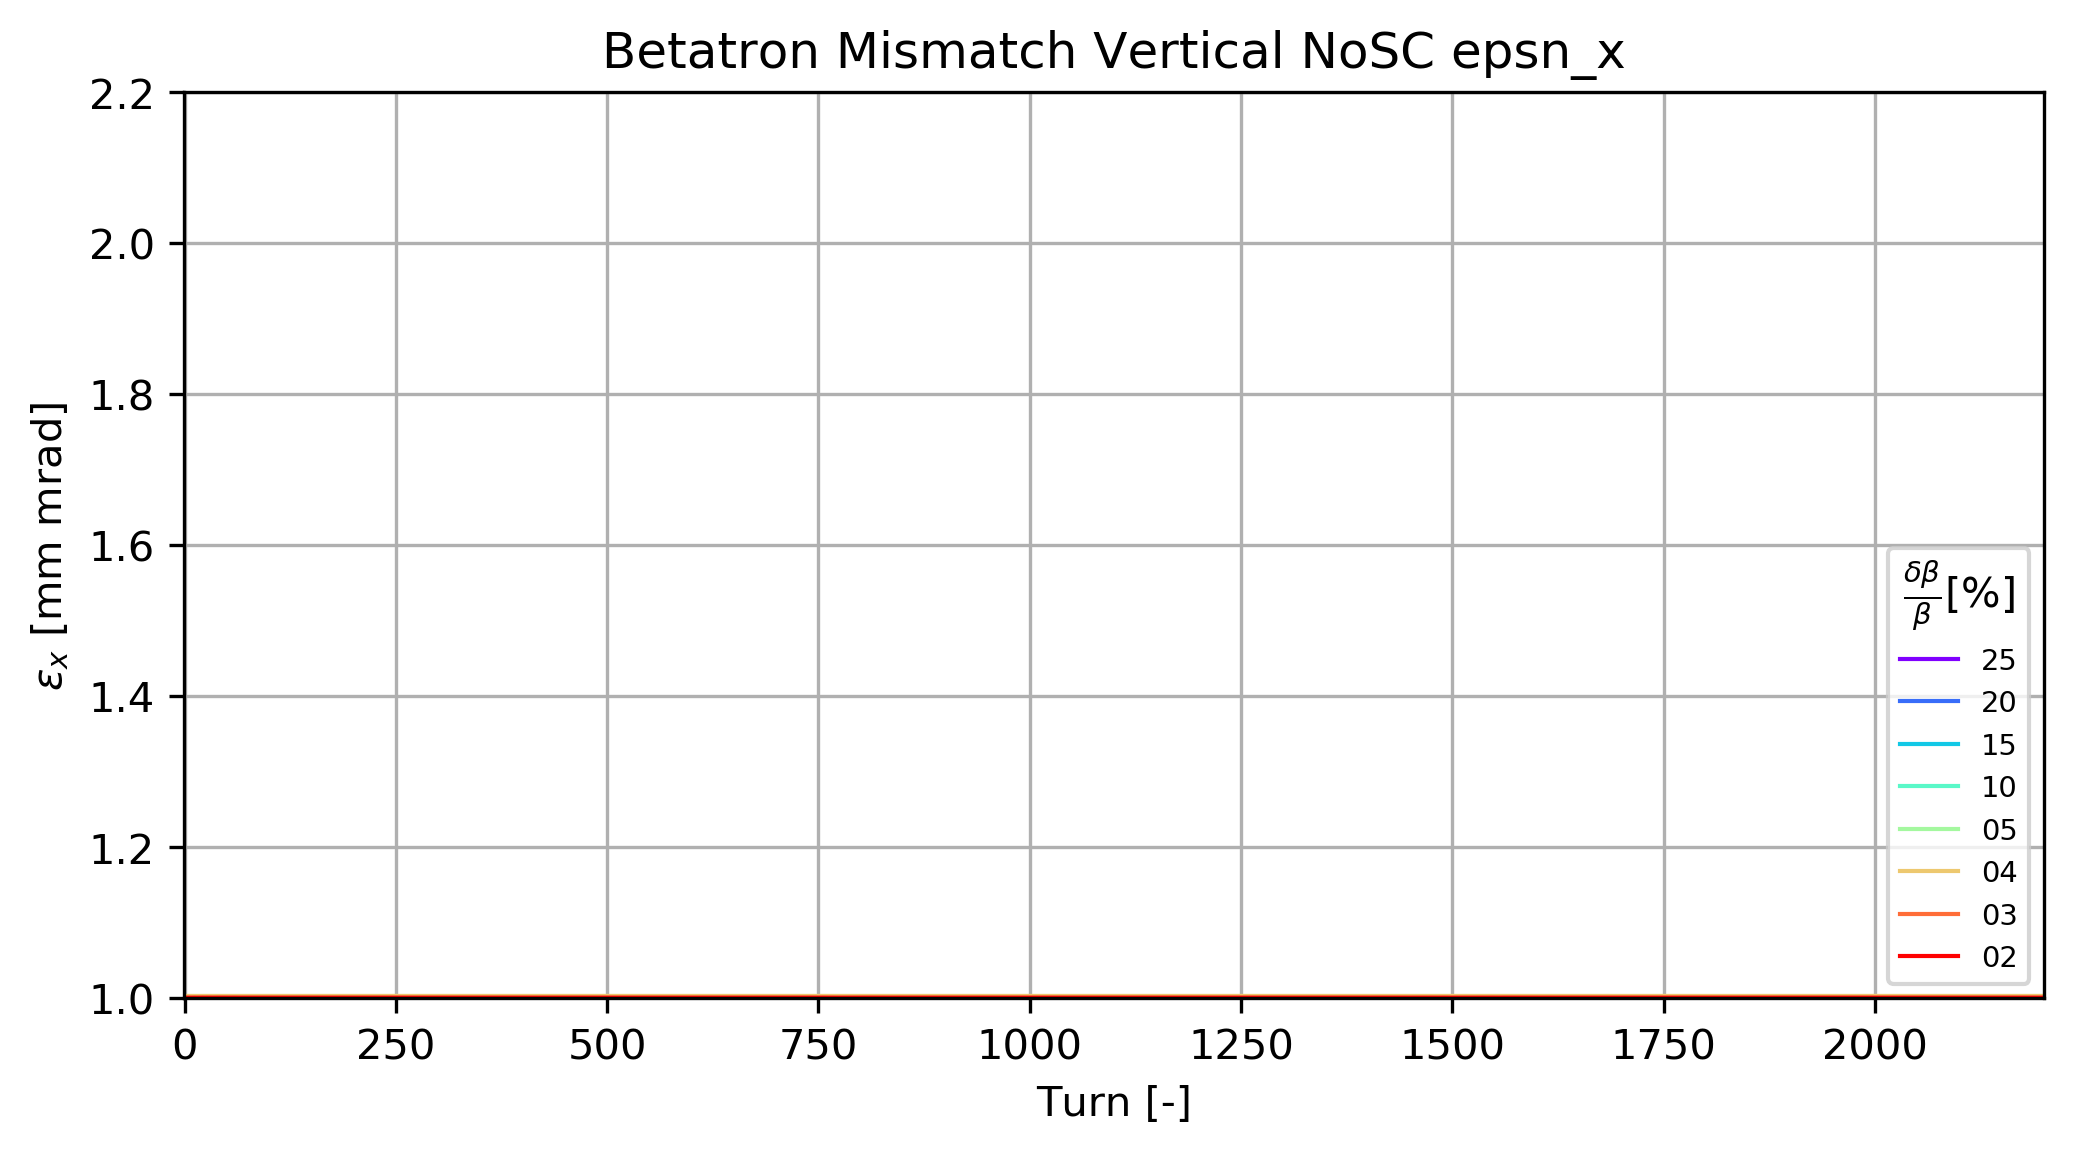

In [68]:
parameter = 'epsn_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_x$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1E6, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label);
ax1.grid();
ax1.set_xlim(-1,2200);
ax1.set_ylim(1., 2.2)

savename = Plot_Folder +'/Betatron_' + parameter + '_scaled_V.png'
plt.savefig(savename, dpi = 800);

25 % Beta-beating = Emittance growth  25.09
20 % Beta-beating = Emittance growth  20.2
15 % Beta-beating = Emittance growth  14.97
10 % Beta-beating = Emittance growth  9.99
05 % Beta-beating = Emittance growth  5.03
04 % Beta-beating = Emittance growth  3.99
03 % Beta-beating = Emittance growth  2.96
02 % Beta-beating = Emittance growth  1.96


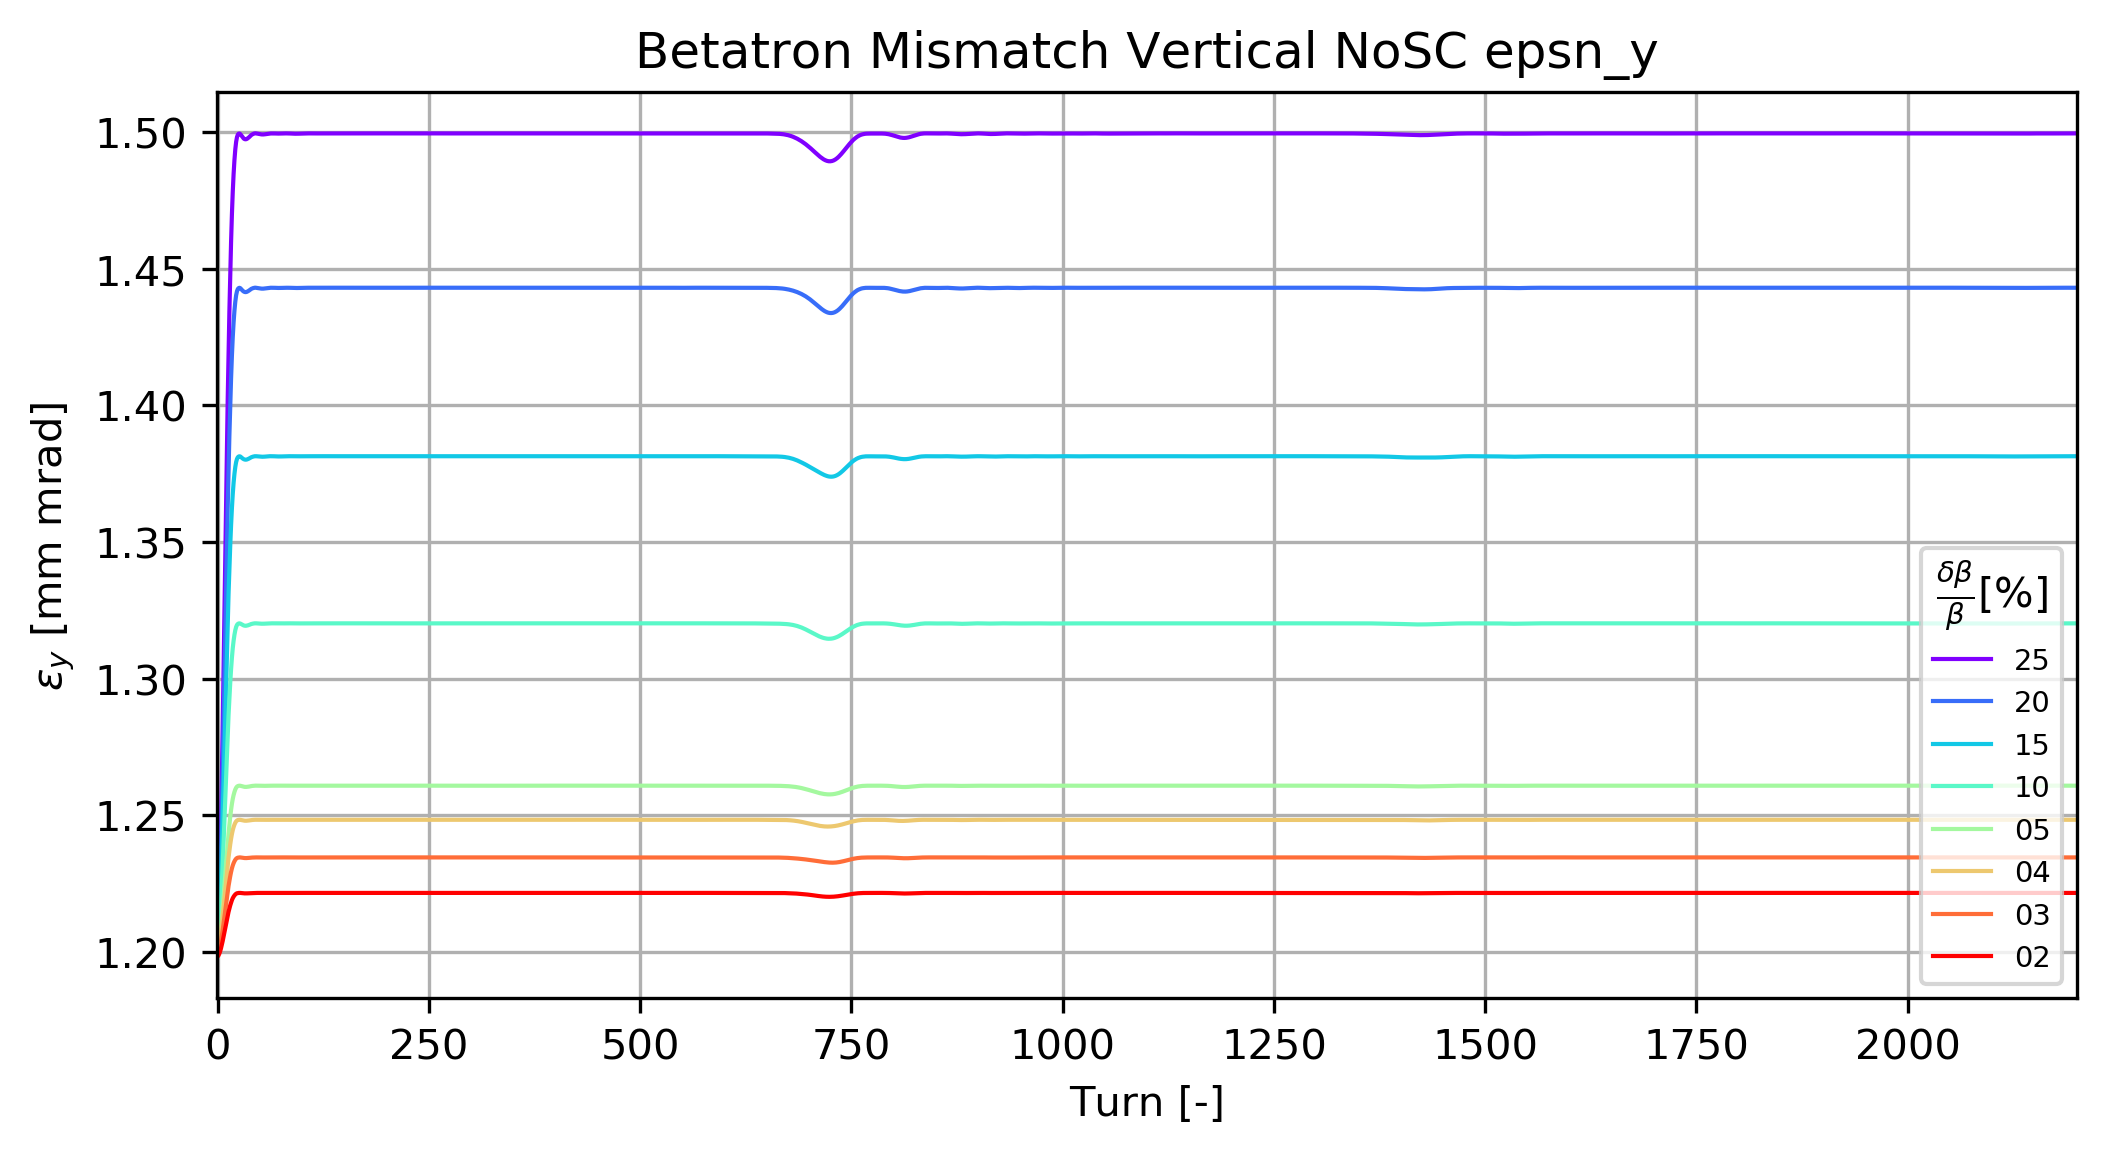

In [69]:
parameter = 'epsn_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_y$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1E6, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        print key, '% Beta-beating = Emittance growth ', round(((np.mean(dd1[key][parameter][0][1000:])/dd1[key][parameter][0][0])-1)*100, 2)
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label);
ax1.grid();
ax1.set_xlim(-1,2200);
#ax1.set_ylim(1, 2.2)

savename = Plot_Folder +'/Betatron_' + parameter + '_V.png'
plt.savefig(savename, dpi = 800);

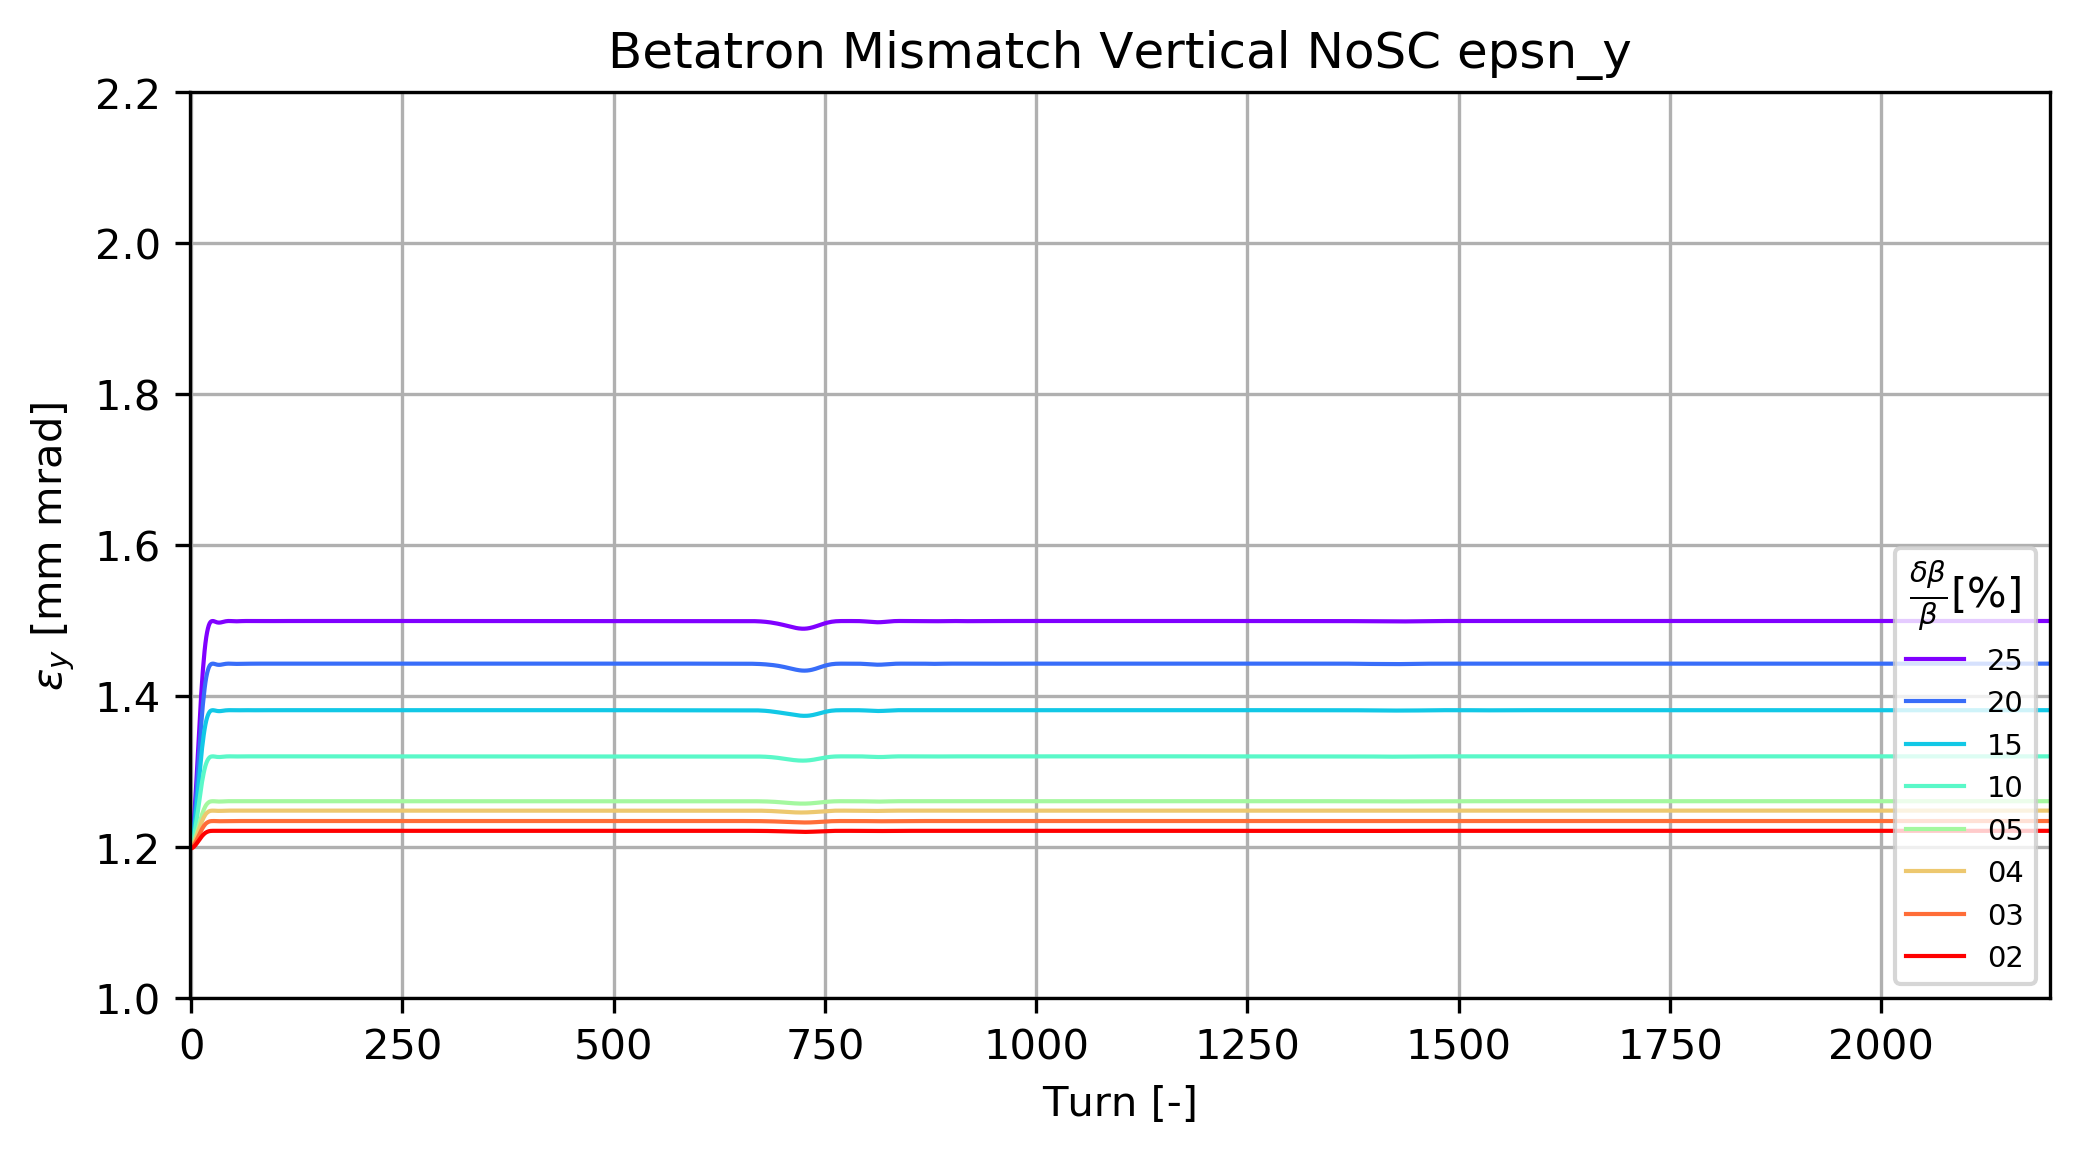

In [70]:
parameter = 'epsn_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_y$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1E6, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label);
ax1.grid();
ax1.set_xlim(-1,2200);
ax1.set_ylim(1, 2.2)

savename = Plot_Folder +'/Betatron_' + parameter + '_scaled_V.png'
plt.savefig(savename, dpi = 800);

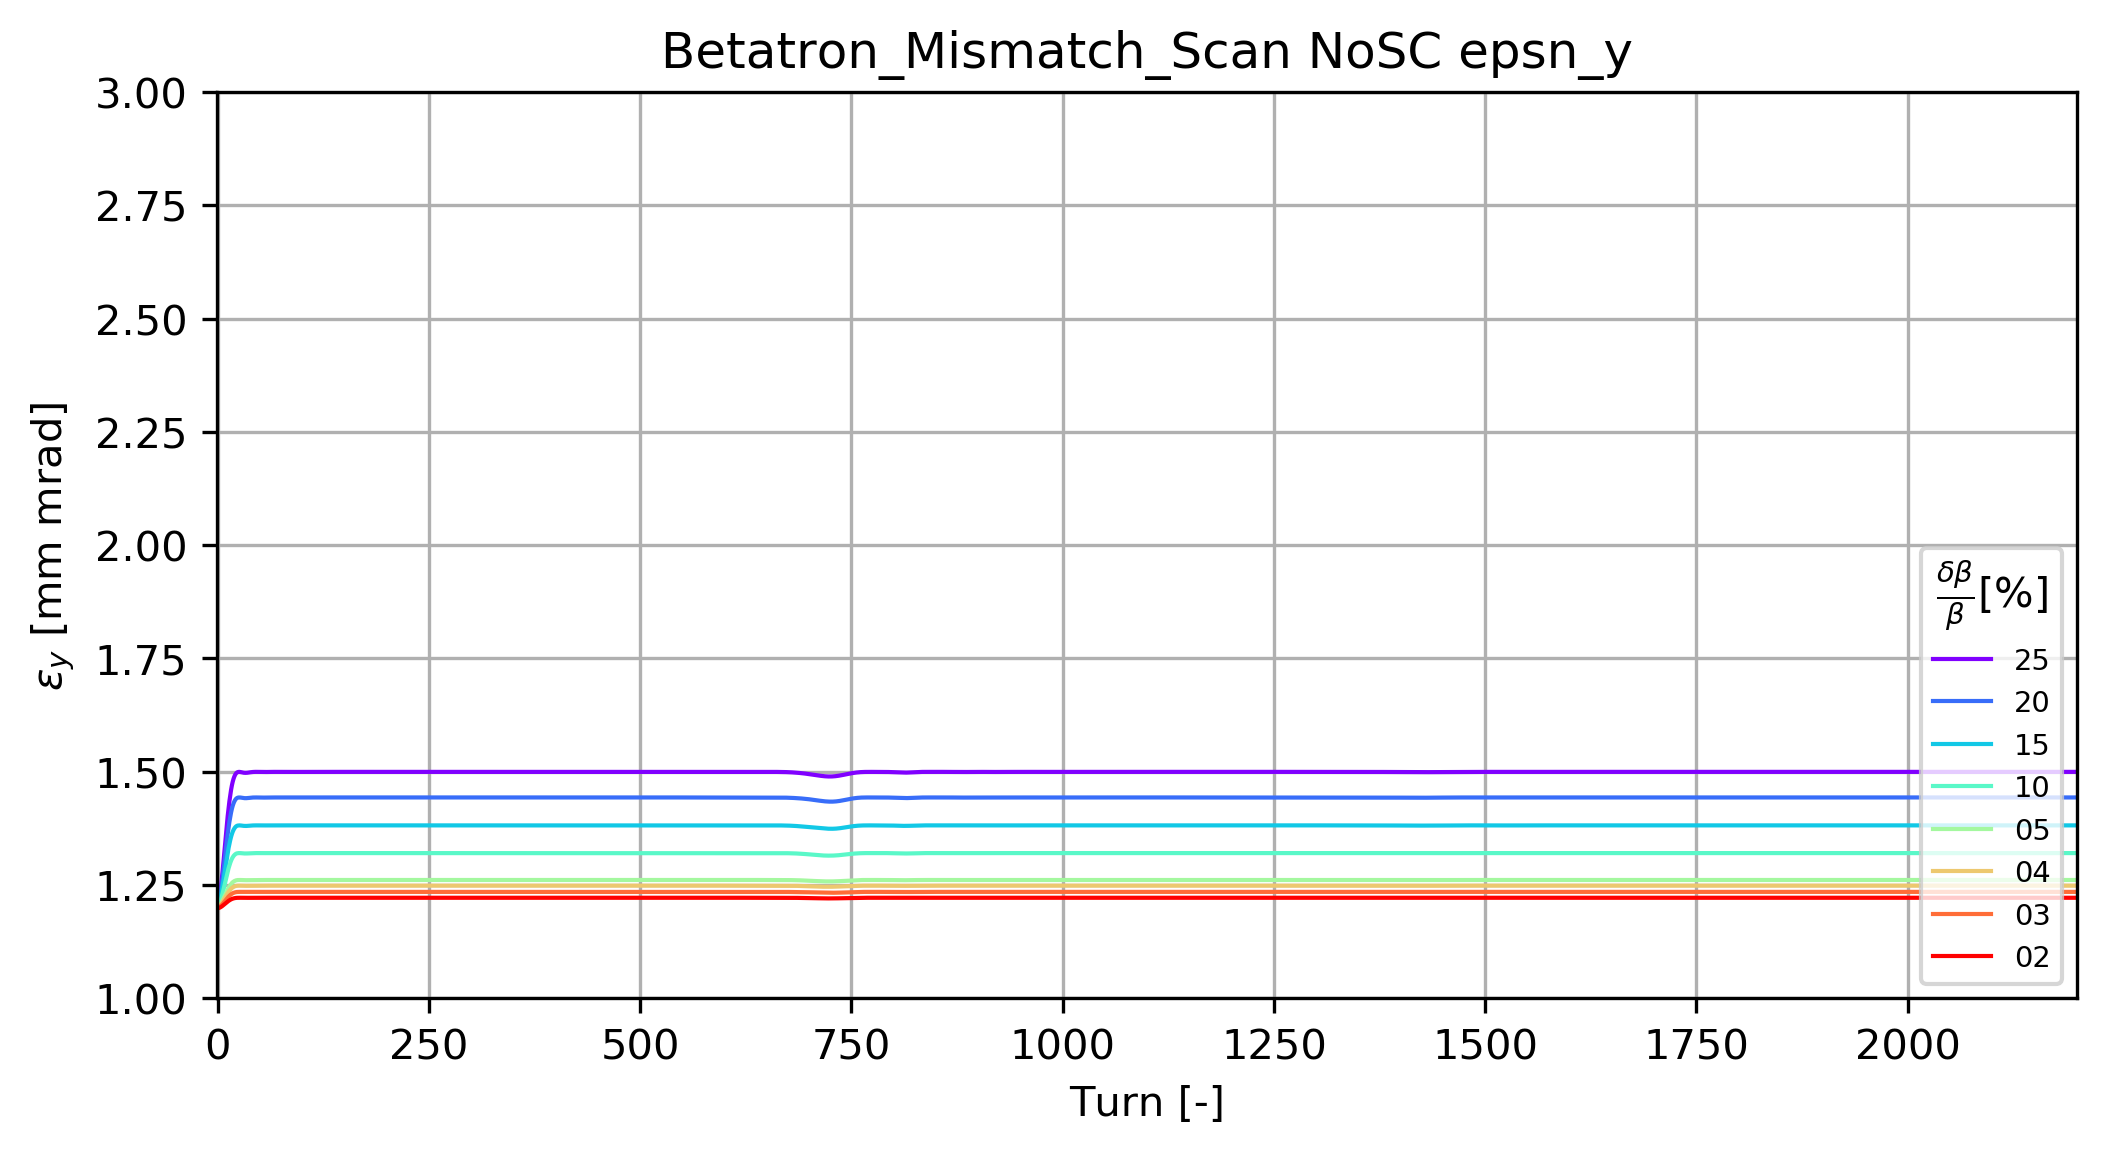

In [18]:
parameter = 'epsn_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_y$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1E6, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label);
ax1.grid();
ax1.set_xlim(-1,2200);
ax1.set_ylim(1, 3)

savename = Plot_Folder +'/Betatron_' + parameter + '_scaled2_H.png'
plt.savefig(savename, dpi = 800);

Started loop for tune  25
2201
## PyNAFF::naff: Remove the DC component from the data (i.e. the mean).
Started loop for tune  20
2201
## PyNAFF::naff: Remove the DC component from the data (i.e. the mean).
Started loop for tune  15
2201
## PyNAFF::naff: Remove the DC component from the data (i.e. the mean).
Started loop for tune  10
2201
## PyNAFF::naff: Remove the DC component from the data (i.e. the mean).
Started loop for tune  05
2201
## PyNAFF::naff: Remove the DC component from the data (i.e. the mean).
Started loop for tune  04
2201
## PyNAFF::naff: Remove the DC component from the data (i.e. the mean).
Started loop for tune  03
2201
## PyNAFF::naff: Remove the DC component from the data (i.e. the mean).
Started loop for tune  02
2201
## PyNAFF::naff: Remove the DC component from the data (i.e. the mean).


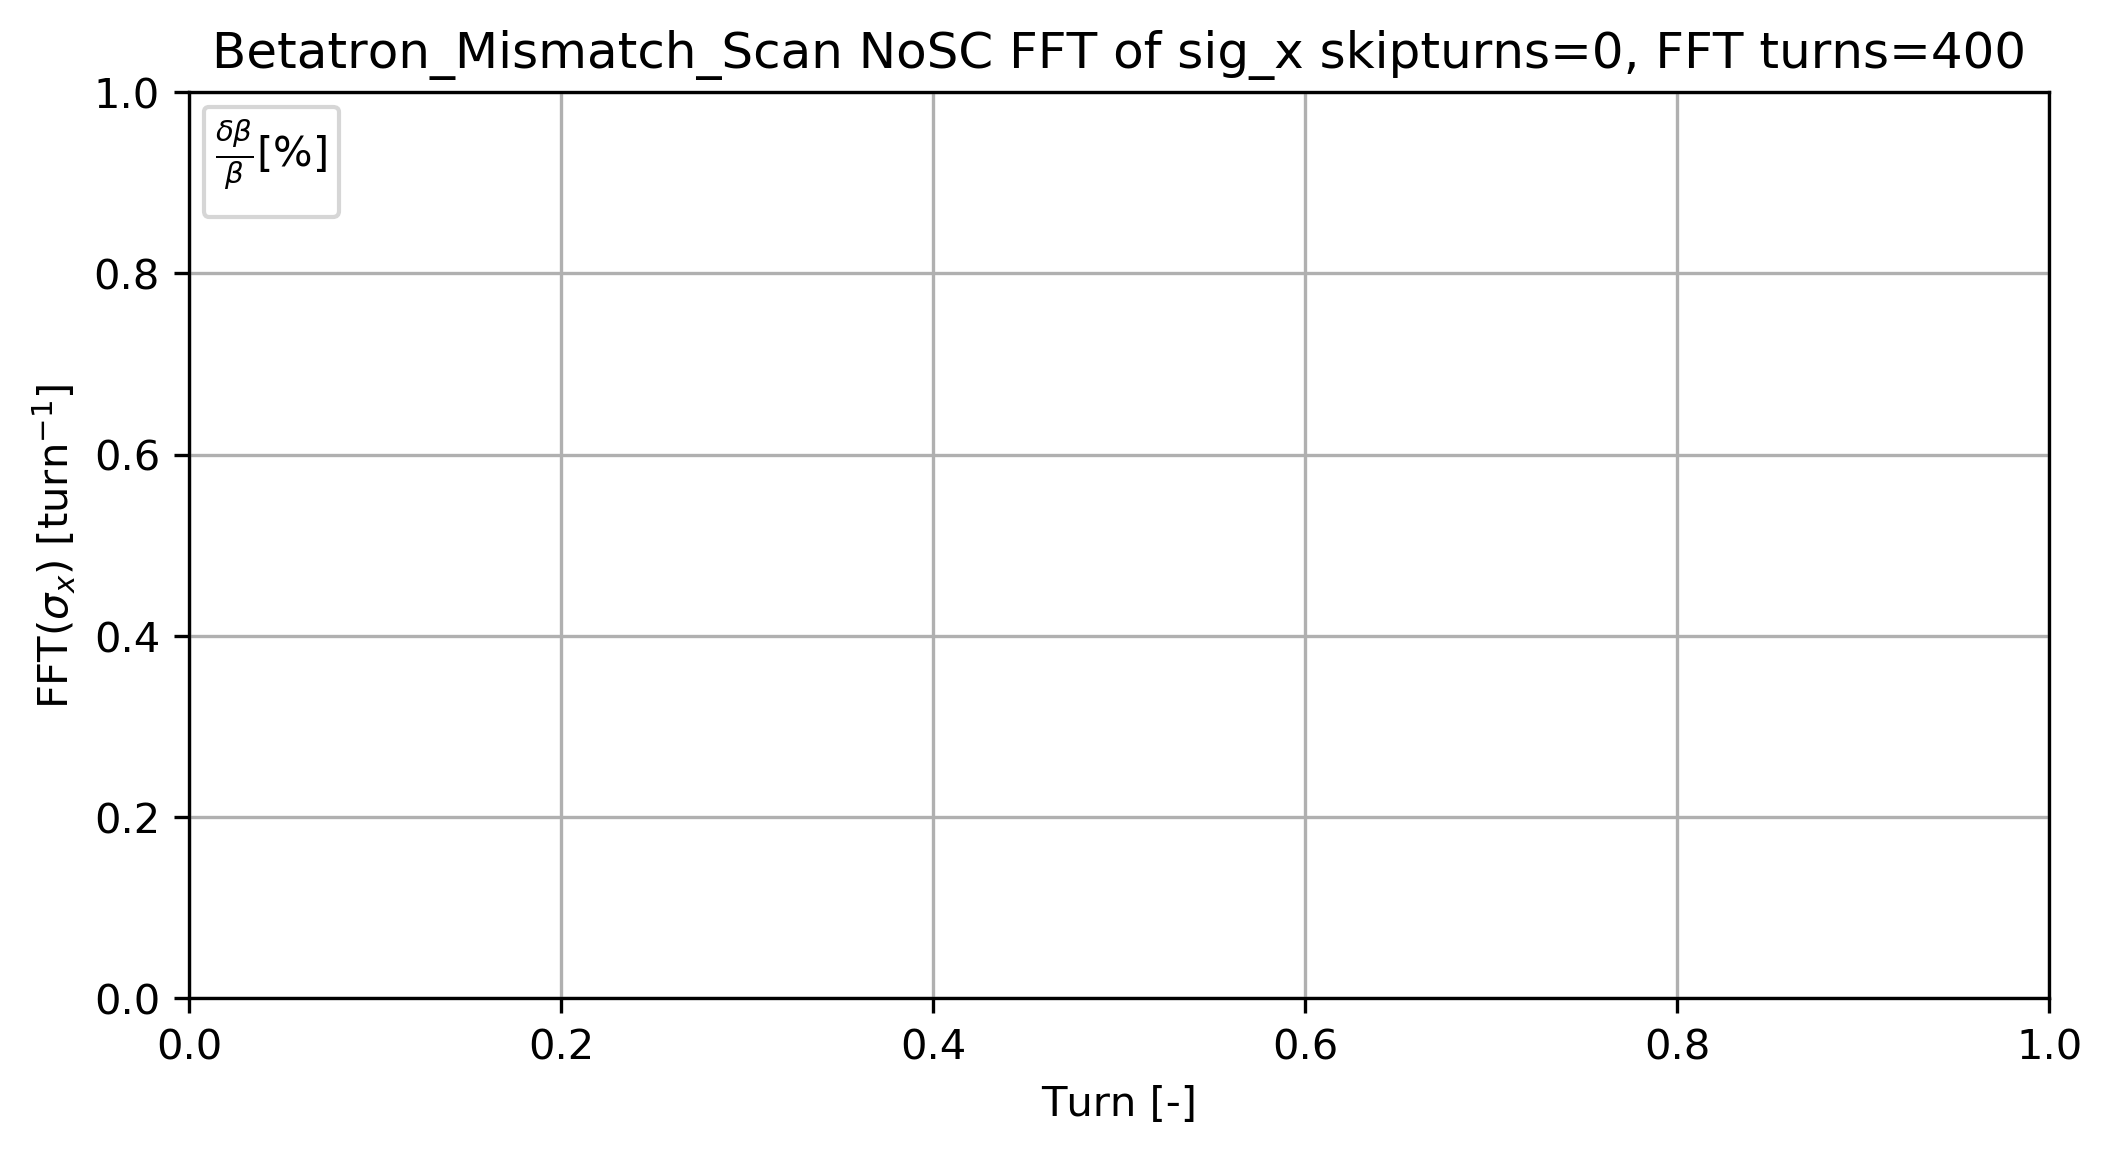

In [19]:
parameter = 'sig_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

trns = 400
skiptrns = 0
tit = main_label + ' ' + sc + ' FFT of ' + parameter + ' skipturns=' +str(skiptrns)+ ', FFT turns=' + str(trns)
ax1.set_title(tit);

ax1.set_ylabel(r'FFT($\sigma_x$) [turn$^{-1}$]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems(), reverse=True):
    print 'Started loop for tune ', key
    y = (dd1[key][parameter][0]-np.mean(dd1[key][parameter][0]))
    print len(y)
    try:
        freq = pnf.naff(y, turns=trns, nterms=1, skipTurns=skiptrns, getFullSpectrum=False, window=1)[0][1]
        ax1.scatter(float(key), freq, label=str(key), color=colors[c_it])
    except IndexError:
        continue    
    c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=2, title=legend_label)
ax1.grid()
#ax1.set_xlim(-1,50)

#savename = Plot_Folder +'/Betatron_' + parameter + '_H.png'
#plt.savefig(savename, dpi = 800);

Started loop for tune  25
Started loop for tune  20
Started loop for tune  15
Started loop for tune  10
Started loop for tune  05
Started loop for tune  04
Started loop for tune  03
Started loop for tune  02


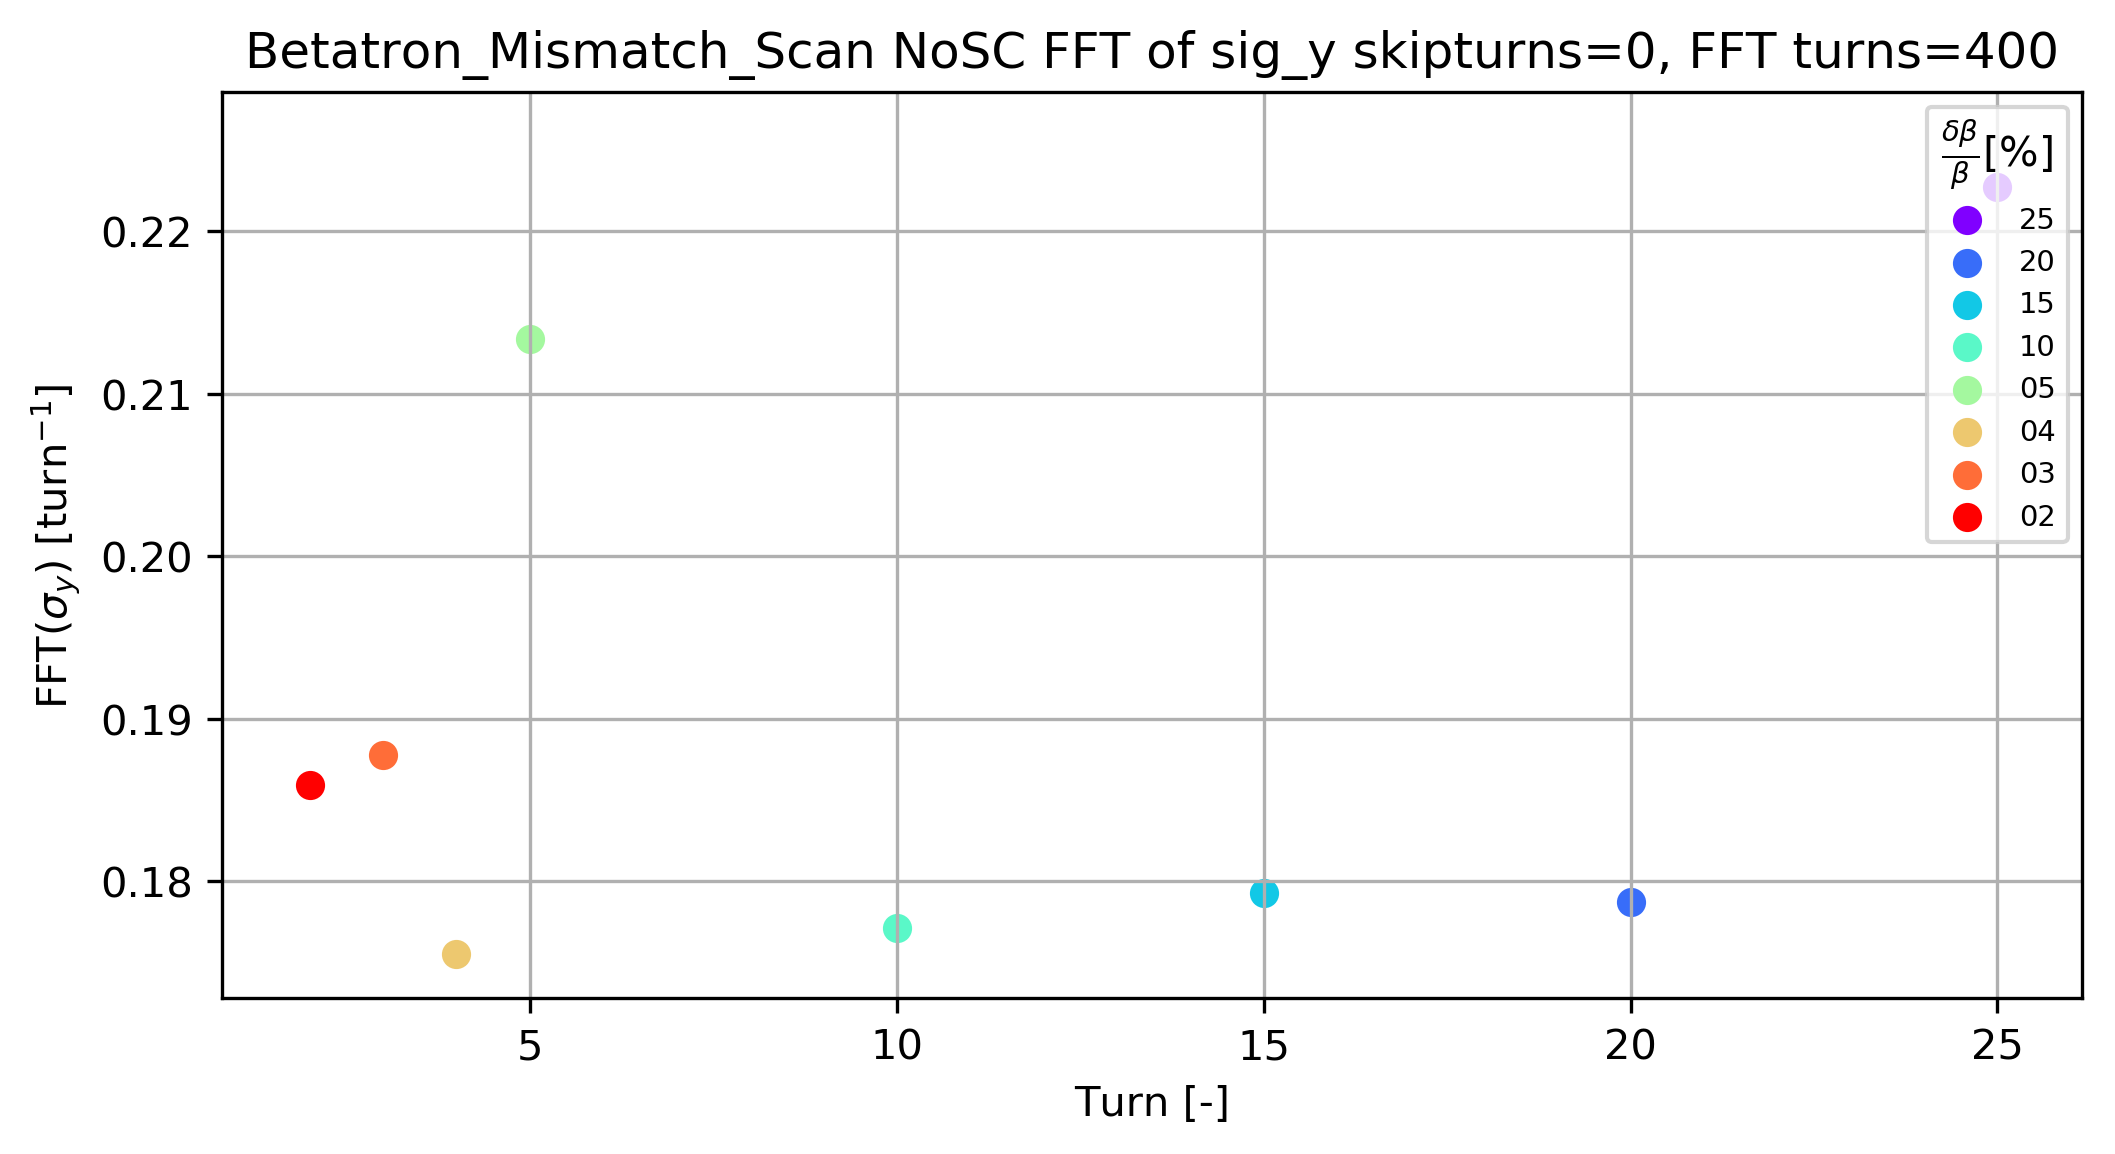

In [20]:
parameter = 'sig_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

trns = 400
skiptrns = 0
tit = main_label + ' ' + sc + ' FFT of ' + parameter + ' skipturns=' +str(skiptrns)+ ', FFT turns=' + str(trns)
ax1.set_title(tit);

ax1.set_ylabel(r'FFT($\sigma_y$) [turn$^{-1}$]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems(), reverse=True):
    print 'Started loop for tune ', key
    y = (dd1[key][parameter][0]-np.mean(dd1[key][parameter][0]))
    try:
        freq = pnf.naff(y, turns=trns, nterms=1, skipTurns=skiptrns, getFullSpectrum=False, window=1)[0][1]
        ax1.scatter(float(key), freq, label=str(key), color=colors[c_it])
    except IndexError:
        continue    
    c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=1, title=legend_label)
ax1.grid()
#ax1.set_xlim(-1,50)

#savename = 'Plots_H_NoSC/Betatron_' + parameter + '_H_NoSC_period.png'
#plt.savefig(savename, dpi = 800);

In [21]:
Q3 = []
Dx3 = []
Dy3 = []
Bx3 = []
By3 = []
Ax3 = []
Ay3 = []
start = 200 # for SC sims we ignore the first n turns

for key, value in sorted(dd1.iteritems()):
    Q3.append(float(key))
    Dx3.append(np.mean(dd1[key]['D_x'][0][start:]))
    Dy3.append(np.mean(dd1[key]['D_y'][0][start:]))
    Bx3.append(np.mean(dd1[key]['beta_x'][0][start:]))
    By3.append(np.mean(dd1[key]['beta_y'][0][start:]))
    Ax3.append(np.mean(dd1[key]['alpha_x'][0][start:]))
    Ay3.append(np.mean(dd1[key]['alpha_y'][0][start:]))

print '\nHorizontal'
print '\nQ_x_V = ', Q3
print '\nDx_V = ', Dx3
print '\nDy_V = ', Dy3
print '\nBeta_x_V = ', Bx3
print '\nBeta_y_V = ', By3
print '\nAlpha_x_V = ', Ax3
print '\nAlpha_y_V = ', Ay3


Horizontal

Q_x_V =  [2.0, 3.0, 4.0, 5.0, 10.0, 15.0, 20.0, 25.0]

Dx_V =  [2.336766549484188, 2.3367700551341537, 2.3367694375465633, 2.3367690105729637, 2.3367668969050976, 2.3367586947340437, 2.3367600005869593, 2.336761395893582]

Dy_V =  [1.3732533103902892e-05, 4.418017137654318e-06, -3.516955178383101e-06, 4.761854572292065e-06, 1.8281888869097808e-06, 1.9585888095010244e-06, -2.35770462939005e-06, -3.0630841205490746e-06]

Beta_x_V =  [12.713636845506578, 12.71363497708899, 12.713625877195039, 12.713639801442273, 12.713620106951916, 12.713598672313536, 12.713601684509225, 12.713609138106143]

Beta_y_V =  [22.42330592388358, 22.42358350689434, 22.42383889853179, 22.424164518630864, 22.42532462169822, 22.426118291697858, 22.426596178637986, 22.427035696923593]

Alpha_x_V =  [-0.014717662139547552, -0.014717794236427195, -0.014717338459630412, -0.014716928473945146, -0.014717178049367447, -0.014717074342984686, -0.01471652837977025, -0.014716340895272916]

Alpha_y_V =  [0.0520830

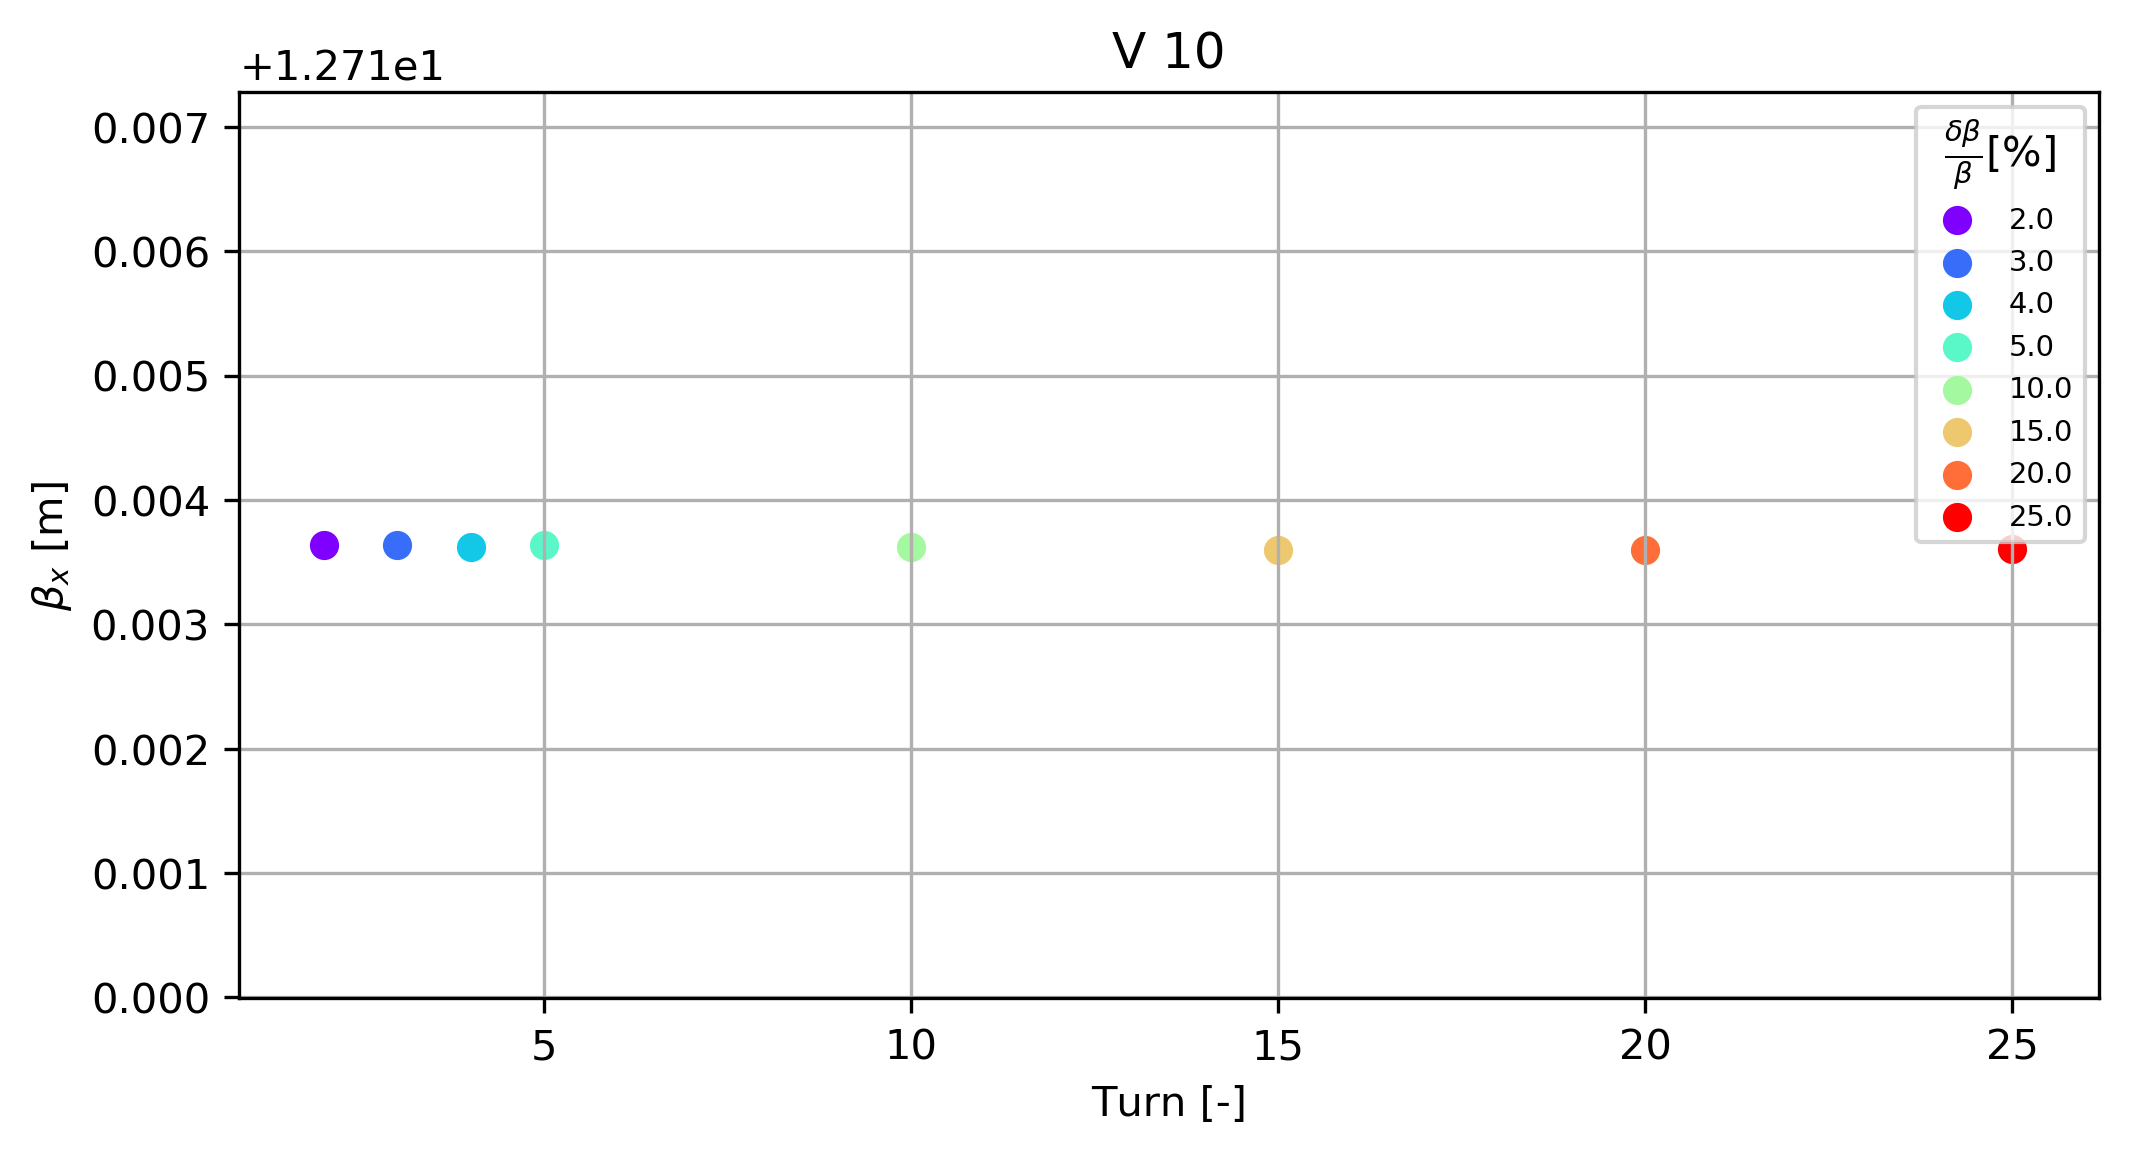

In [22]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title('V 10');

ax1.set_ylabel(r'$\beta_x$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(Q3)))
c_it = int(0)


for i in range(len(Q3)):
    ax1.scatter(Q3[i], Bx3[i], label=Q3[i], color=colors[c_it]);
    c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=1, title=legend_label)
ax1.grid()
#ax1.set_xlim(-1,2200)
#ax1.set_ylim(16, 23)

#savename = 'Plots_H/' + parameter + '_H.png'
plt.savefig(str(Plot_Folder +'/Horizontal_Betas.png'), dpi = 800);

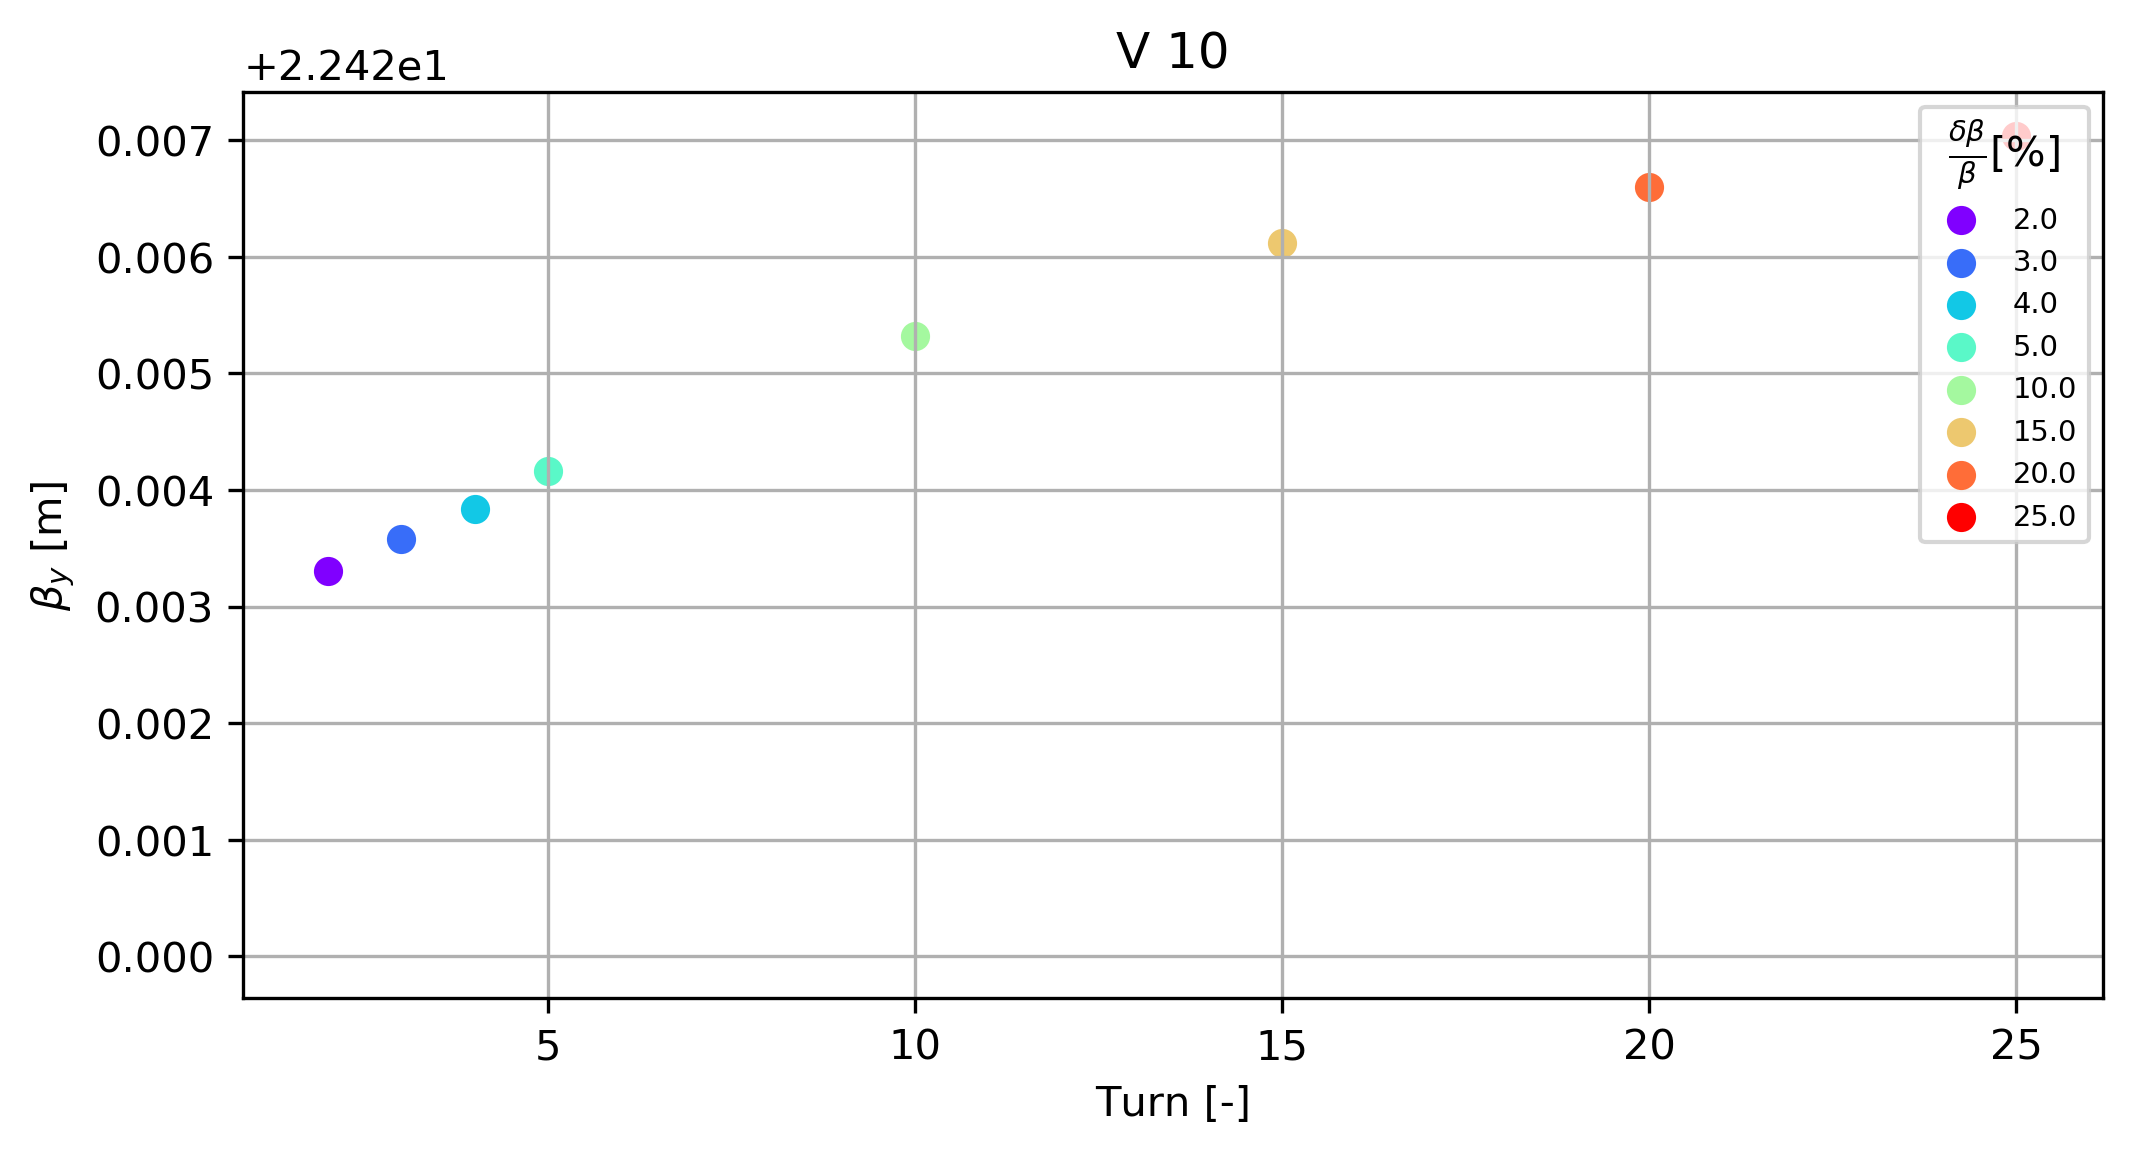

In [23]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title('V 10');

ax1.set_ylabel(r'$\beta_y$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(Q3)))
c_it = int(0)


for i in range(len(Q3)):
    ax1.scatter(Q3[i], By3[i], label=Q3[i], color=colors[c_it]);
    c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=1, title=legend_label)
ax1.grid()
#ax1.set_xlim(-1,2200)
#ax1.set_ylim(16, 23)

#savename = 'Plots_H/' + parameter + '_H.png'
plt.savefig(str(Plot_Folder +'/Vertical_Betas.png'), dpi = 800);

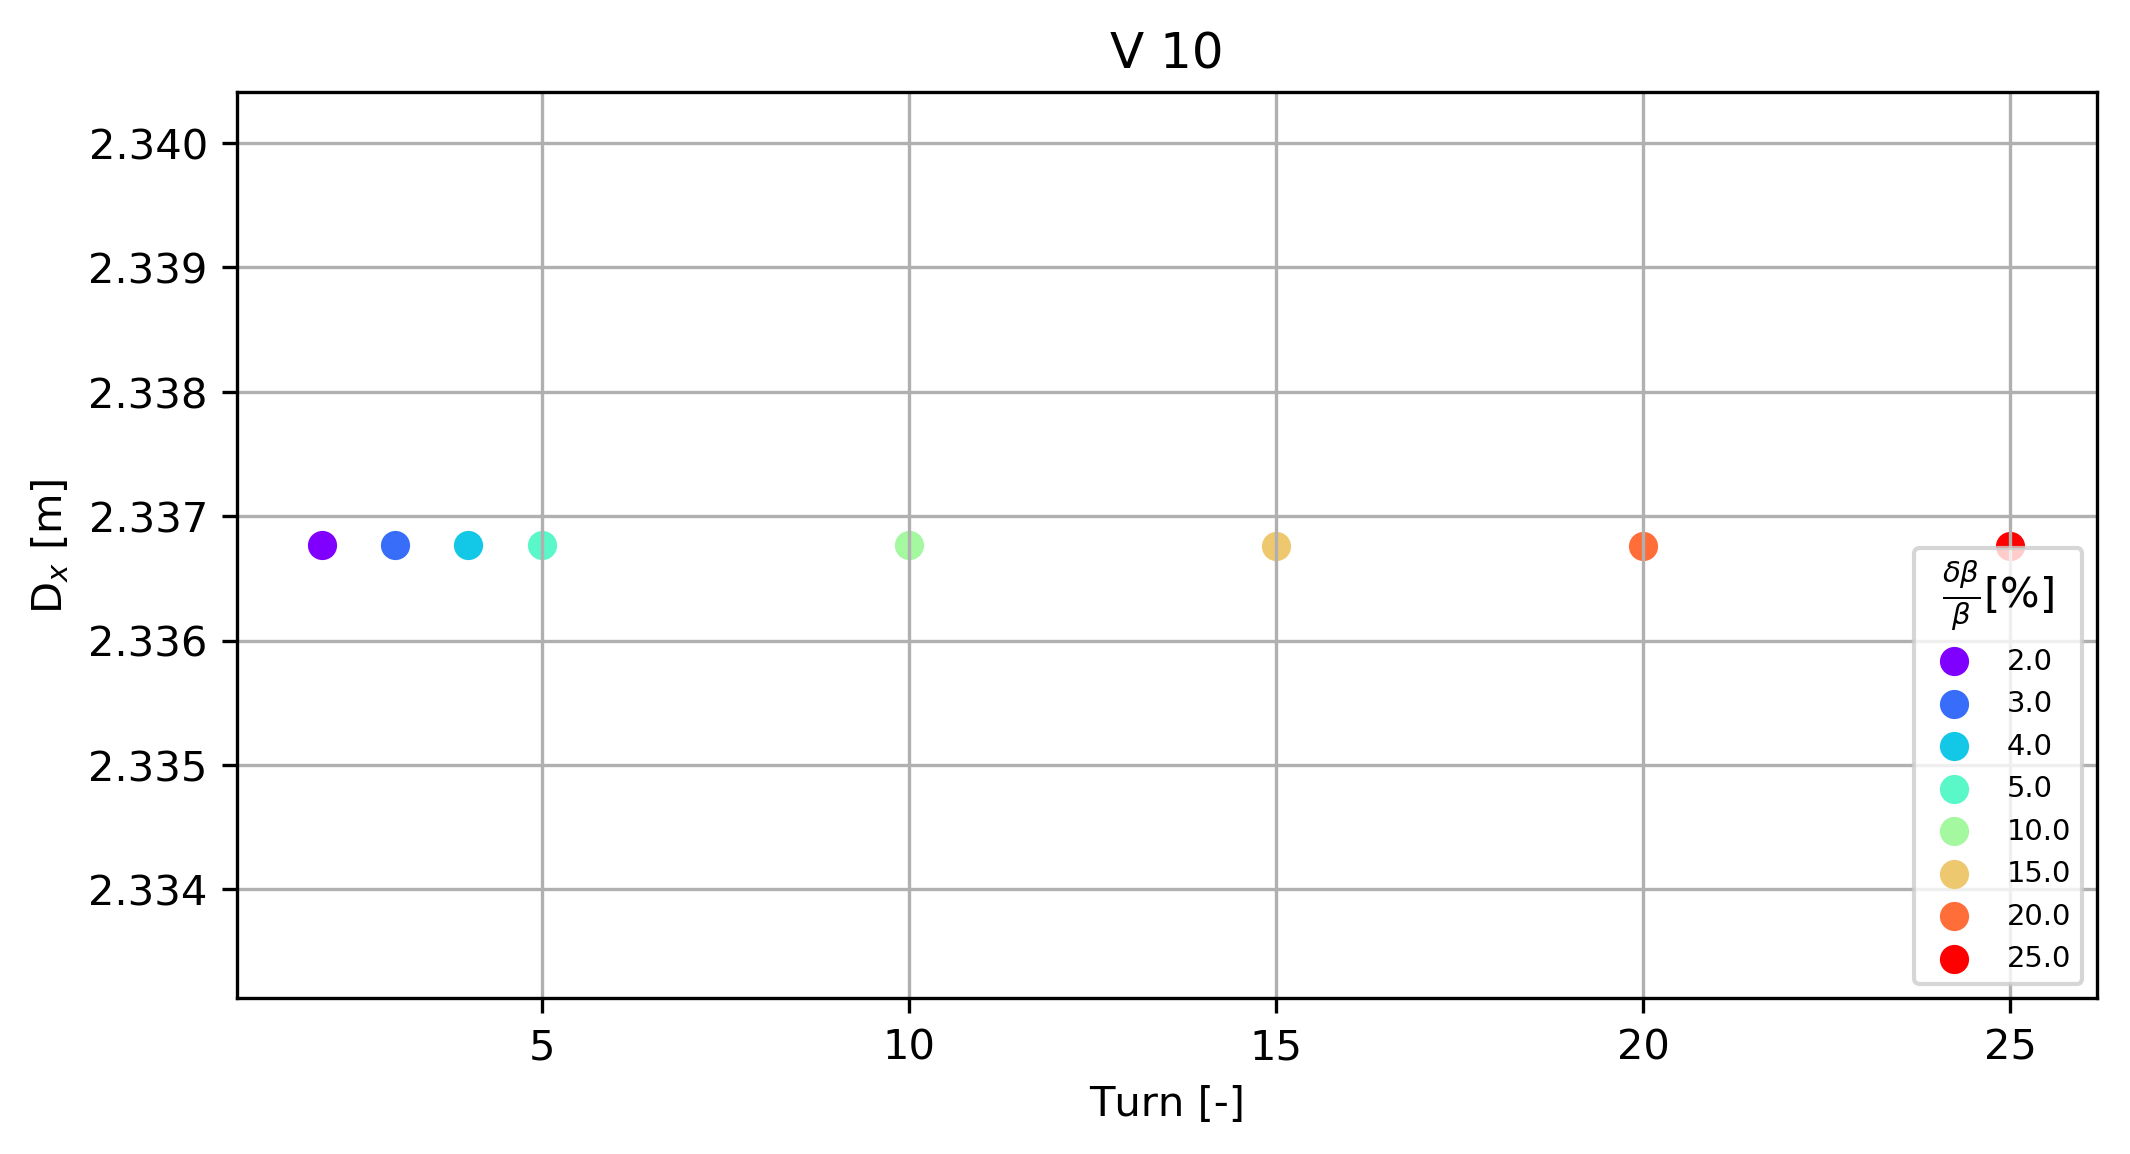

In [24]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title('V 10');

ax1.set_ylabel(r'D$_x$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(Q3)))
c_it = int(0)


for i in range(len(Q3)):
    ax1.scatter(Q3[i], Dx3[i], label=Q3[i], color=colors[c_it]);
    c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
#ax1.set_xlim(-1,2200)
#ax1.set_ylim(3, 5.5)

#savename = 'Plots_H/' + parameter + '_H.png'
plt.savefig(str(Plot_Folder +'/Horizontal_Ds.png'), dpi = 800);

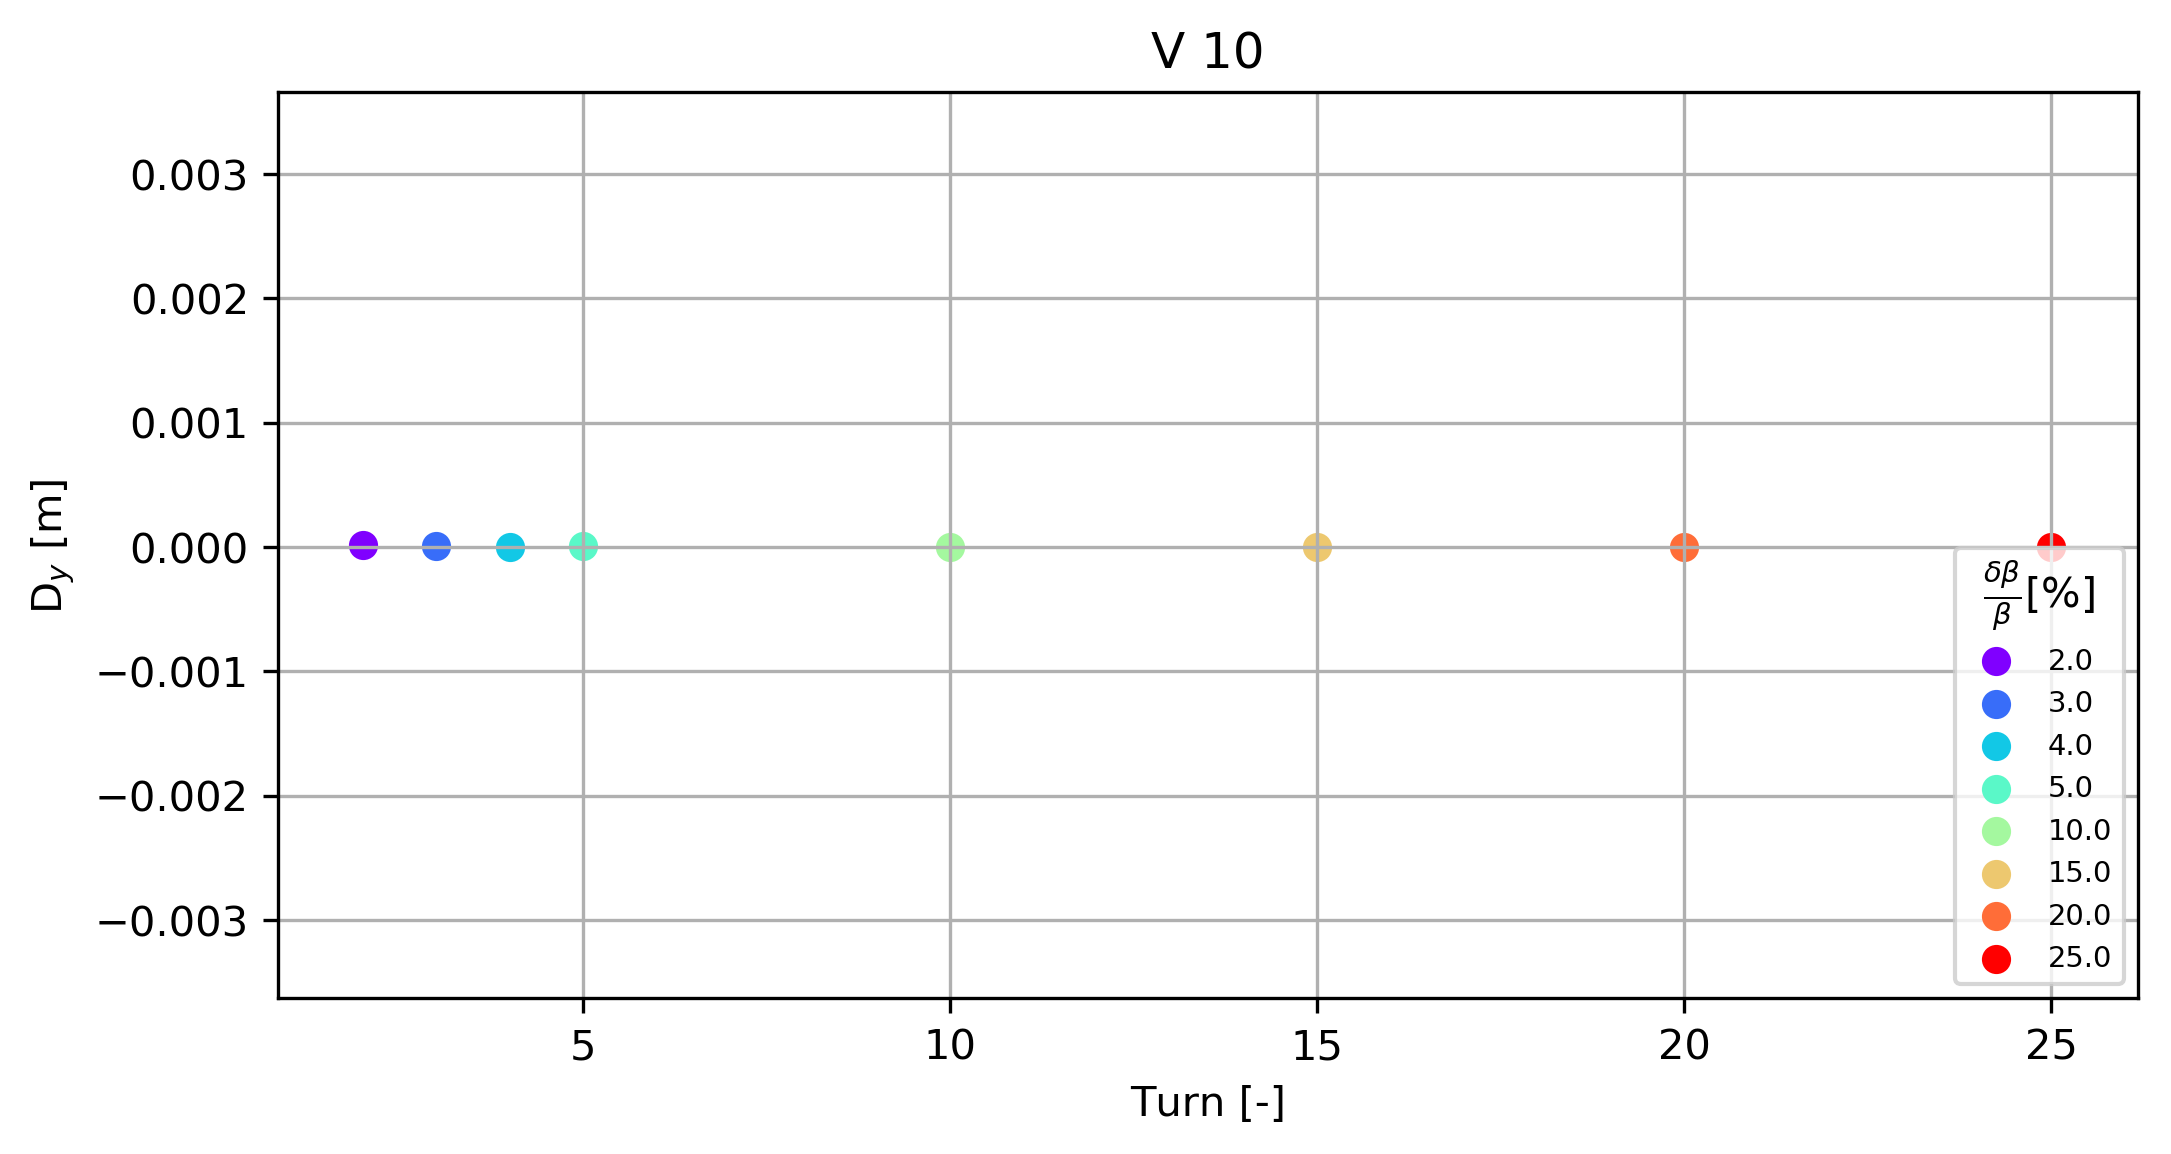

In [25]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title('V 10');

ax1.set_ylabel(r'D$_y$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(Q3)))
c_it = int(0)


for i in range(len(Q3)):
    ax1.scatter(Q3[i], Dy3[i], label=Q3[i], color=colors[c_it]);
    c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
#ax1.set_xlim(-1,2200)
#ax1.set_ylim(3, 5.5)

#savename = 'Plots_H/' + parameter + '_H.png'
plt.savefig(str(Plot_Folder +'/Vertical_Ds.png'), dpi = 800);